<a href="https://colab.research.google.com/github/maurofama99/ann_challenge/blob/main/ANN_challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/ANN/data1

/gdrive/My Drive/ANN/data1


Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)



2.9.2


seed for reproducivity

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

suppress warnings

In [ ]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Exploration Data Analysis (EDA)

unzip data file

In [ ]:
# Load the dataset to be used for classification
if not os.path.exists('x_train.npy'):
  !unzip training_dataset_homework2.zip

In [ ]:
x = np.load('x_train.npy', encoding='bytes')
y = np.load('y_train.npy', encoding='bytes')

In [ ]:
x

array([[[ 1.7597e+01,  8.1713e+00, -1.7842e+00, -1.9706e+01,
         -9.7135e+00, -6.1887e+01],
        [ 2.2974e-01, -5.8956e+00,  1.6837e+01,  5.0390e+00,
          2.4332e+00,  5.8914e+01],
        [-2.9654e+01, -2.1296e+01,  2.9103e+01, -4.7503e-01,
          7.5391e+01,  1.0665e+01],
        ...,
        [ 1.1982e+02,  2.1849e+02,  1.6398e+03,  5.9787e+02,
          2.1922e+03,  1.8484e+01],
        [ 9.1591e+01,  1.0378e+02,  1.8238e+03,  1.2460e+03,
          1.1301e+04,  7.5107e+02],
        [ 4.3719e+01,  3.0689e+01,  9.5092e+02,  8.5927e+02,
          8.1331e+03,  9.8883e+02]],

       [[ 2.4209e+00, -5.6039e-01,  2.3654e+01, -3.8171e+00,
          1.3721e+00,  8.2510e+00],
        [ 1.6847e+00,  2.3989e+01,  1.7803e+01, -1.9575e+01,
         -8.2534e+00, -2.3959e+01],
        [ 5.0692e-01,  5.0281e+01,  5.1196e+01,  1.6036e+01,
          7.2974e-01, -1.8185e+01],
        ...,
        [-1.5618e+01, -7.4233e+00,  3.7833e+00,  1.6565e+00,
         -1.0438e+01, -5.5229e+00],
  

In [ ]:
x.shape

(2429, 36, 6)

In [ ]:
y

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [ ]:
y.shape

(2429,)

In [ ]:
classes_list = ['Wish',         # 0
                'Another',      # 1
                'Comfortably',  # 2
                'Money',        # 3
                'Breathe',      # 4
                'Time',         # 5
                'Brain',        # 6
                'Echoes',       # 7
                'Wearing',      # 8
                'Sorrow',       # 9
                'Hey',          # 10
                'Shine']        # 11

count = [0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
from collections import Counter

counter = Counter(y)
tot_number = 0;

for i in range(len(classes_list)):
  count[i] = counter[i]
  tot_number += count[i]
  print("The number of ", classes_list[i], " is: ", count[i])

print("The total number of data is: ", tot_number)

The number of  Wish  is:  34
The number of  Another  is:  123
The number of  Comfortably  is:  270
The number of  Money  is:  381
The number of  Breathe  is:  62
The number of  Time  is:  153
The number of  Brain  is:  313
The number of  Echoes  is:  68
The number of  Wearing  is:  120
The number of  Sorrow  is:  777
The number of  Hey  is:  77
The number of  Shine  is:  51
The total number of data is:  2429


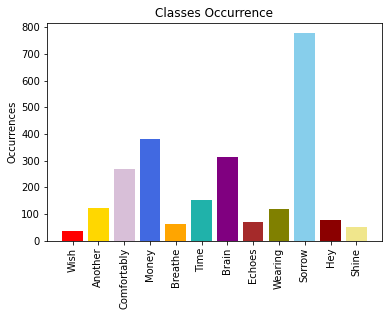

In [ ]:
erc = ['red', 'gold', 'thistle', 'royalblue', 'orange', 'lightseagreen', 'purple', 'brown', 'olive', 'skyblue', 'darkred', 'khaki']
plt.bar(classes_list, count, color = erc)
plt.title("Classes Occurrence")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)
plt.yticks
plt.show()

#Split in train and test set

In [ ]:
size_train = [0,0,0,0,0,0,0,0,0,0,0,0]
size_test = [0,0,0,0,0,0,0,0,0,0,0,0]

for label in range(len(classes_list)):
  tot_label = count[label]
  size_train[label] = int(tot_label*0.8)
  size_test[label] = tot_label - size_train[label]

dim1_train = np.cumsum(size_train)[len(size_train)-1]
dim1_test = np.cumsum(size_test)[len(size_test)-1]

x_train = np.zeros((dim1_train, x.shape[1], x.shape[2]))
y_train = np.zeros((dim1_train))
x_test = np.zeros((dim1_test, x.shape[1], x.shape[2]))
y_test = np.zeros((dim1_test))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1938, 36, 6) (1938,) (491, 36, 6) (491,)


In [ ]:
x[0].shape

(36, 6)

In [ ]:
row = 0
row_train = 0
row_test = 0
for label in range(len(classes_list)):
  for i in range(size_train[label]):
    #we add in train set
    batch = row + i
    #print(batch)
    x_train[row_train] = x[batch]
    y_train[row_train] = y[batch]
    row_train += 1
  row += size_train[label] 
  
  for i in range(size_test[label]):
    #we add in test set
    batch = row + i
    #print(batch)
    x_test[row_test] = x[batch]
    y_test[row_test] = y[batch]
    row_test += 1
  row += size_test[label] 
  
  
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1938, 36, 6) (1938,) (491, 36, 6) (491,)


In [ ]:
def inspect_activity(label, df):
    data = df[df['label'] == label][['ch1', 'ch2', 'ch3','ch4','ch5','ch6']][:]
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)
    for ax in axis:
        ax.legend(loc='lower right')

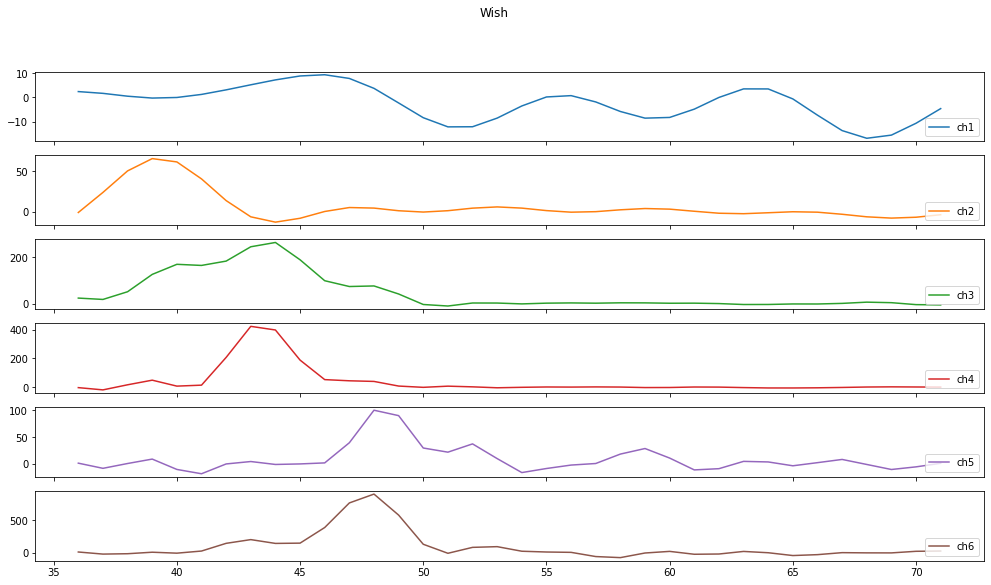

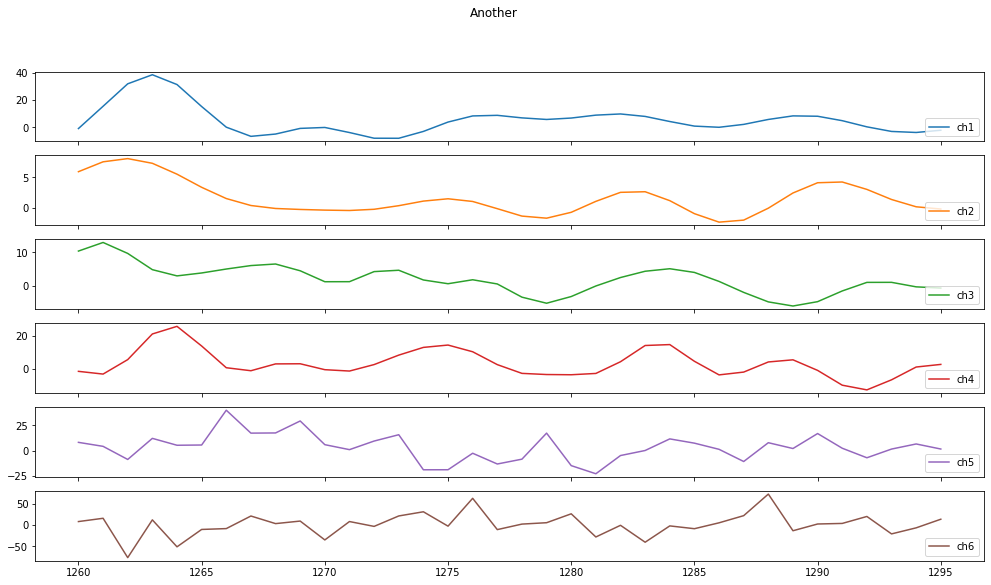

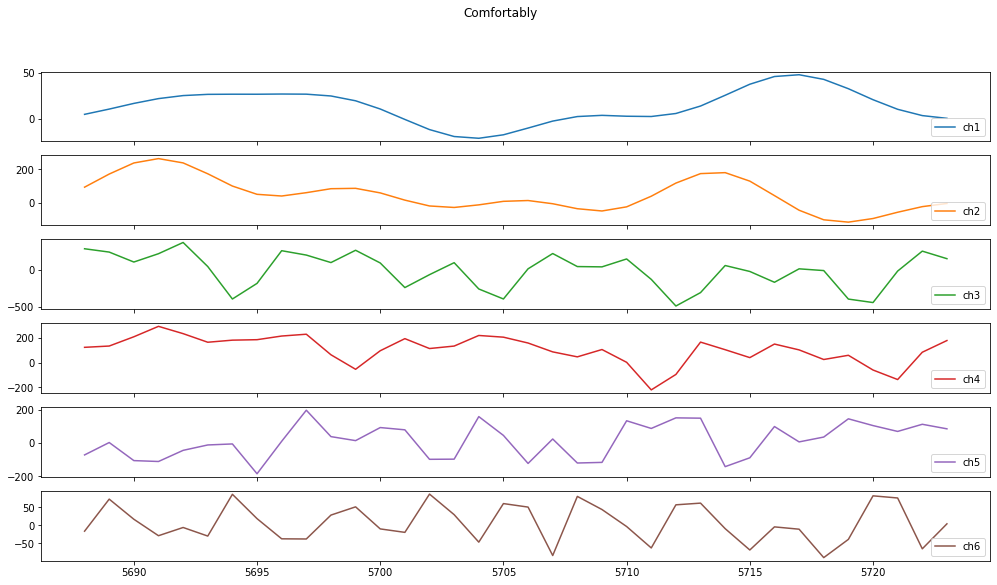

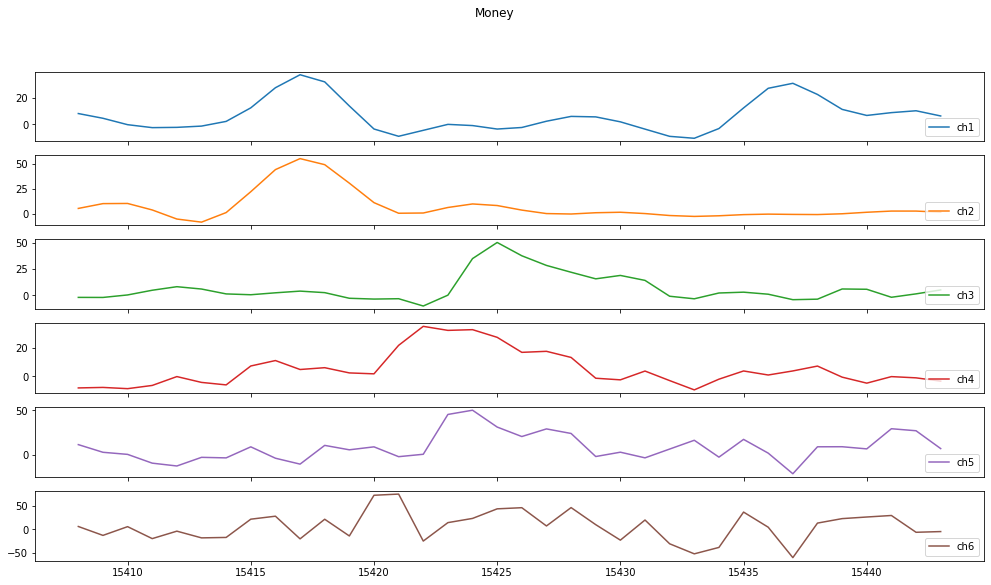

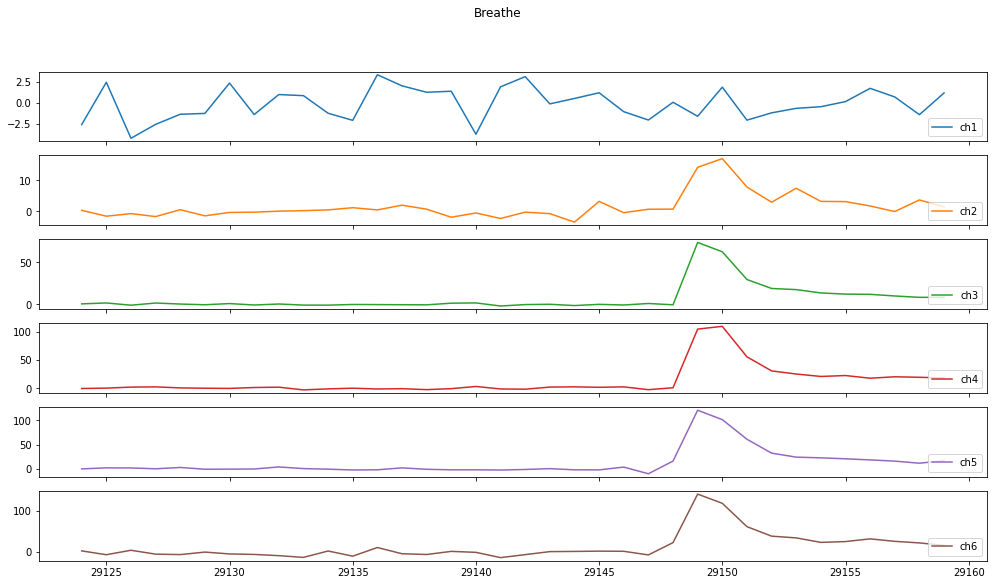

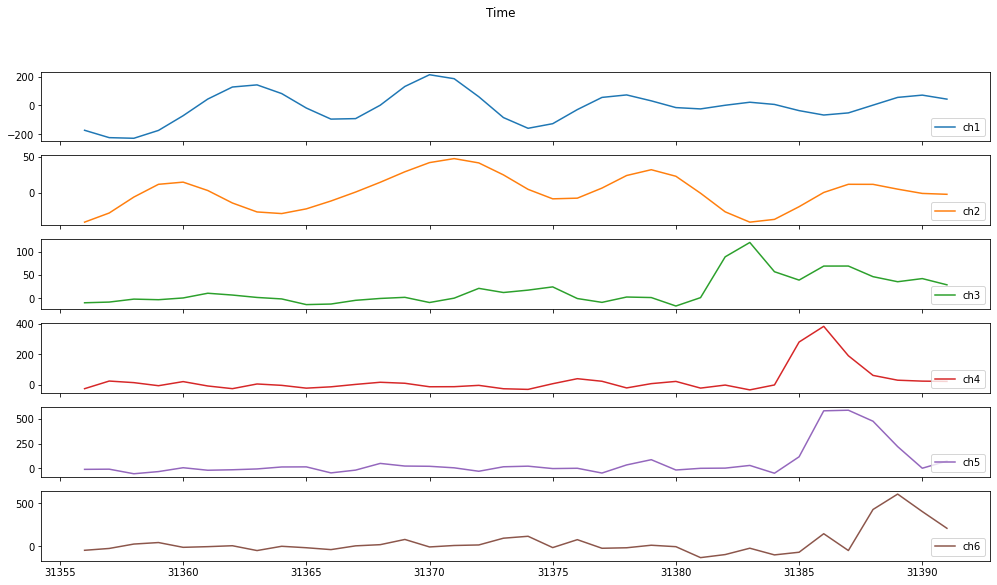

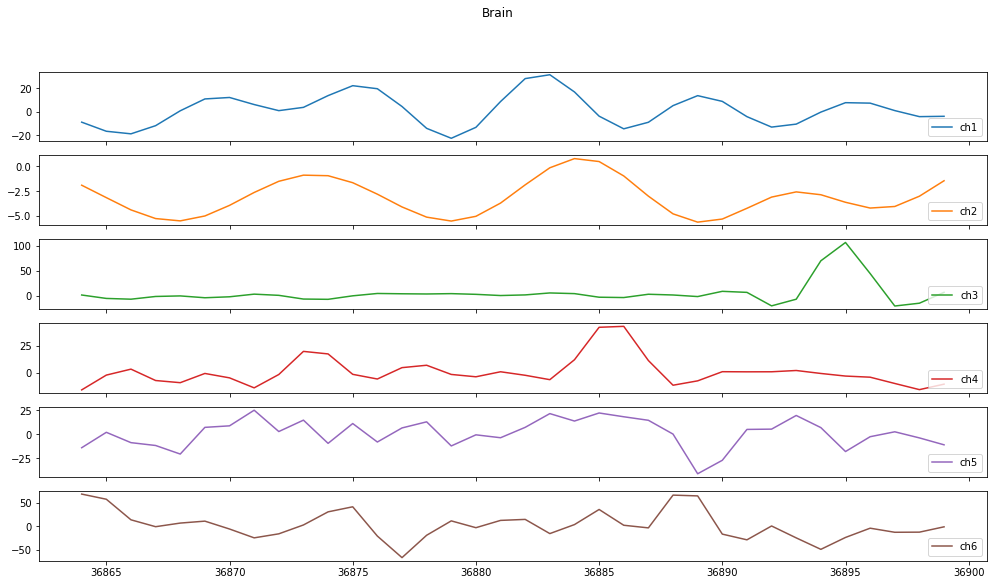

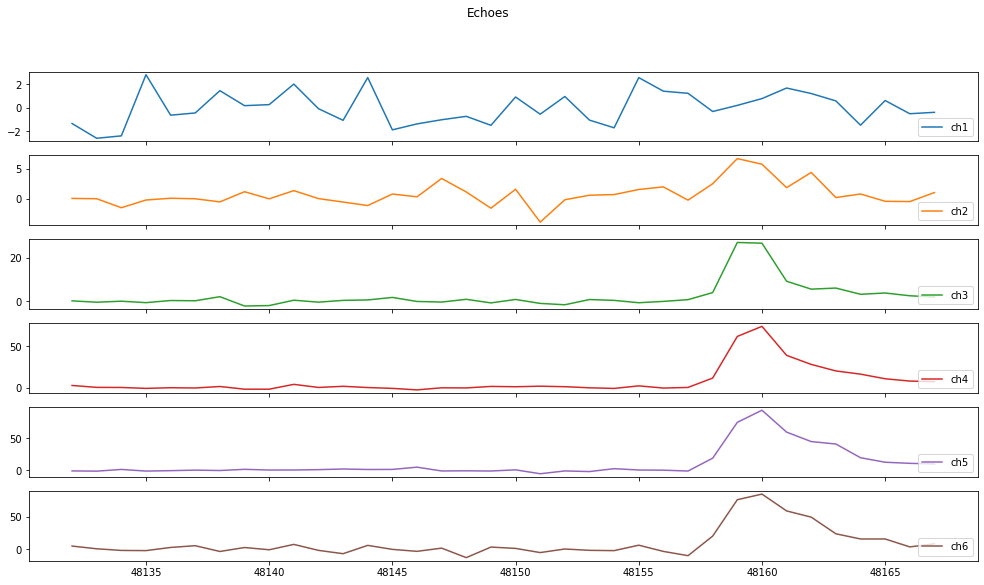

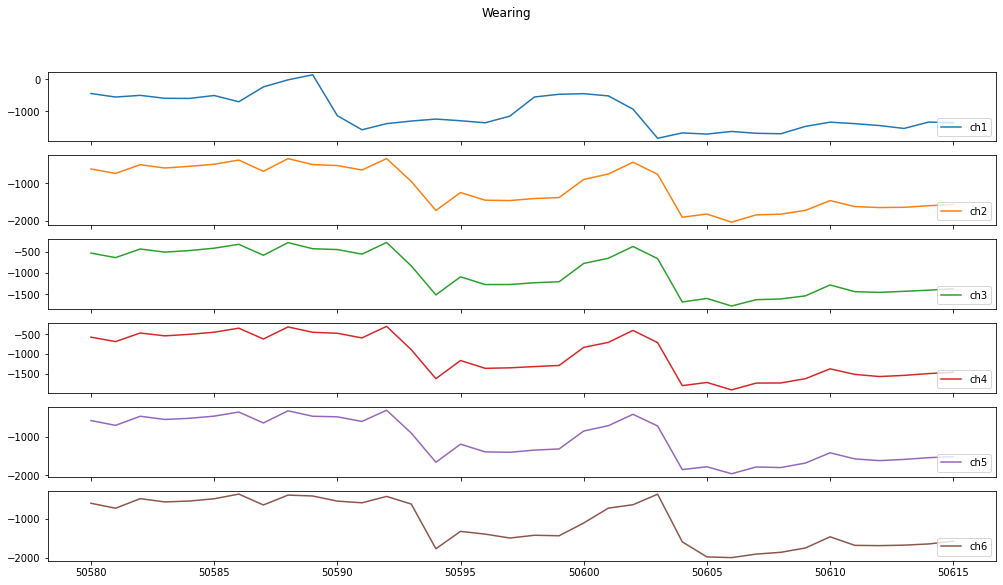

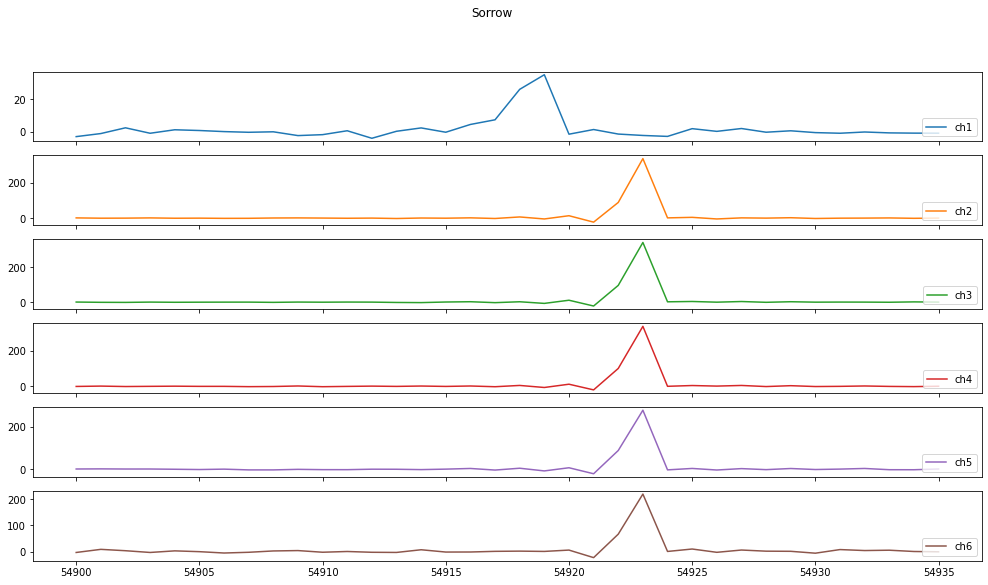

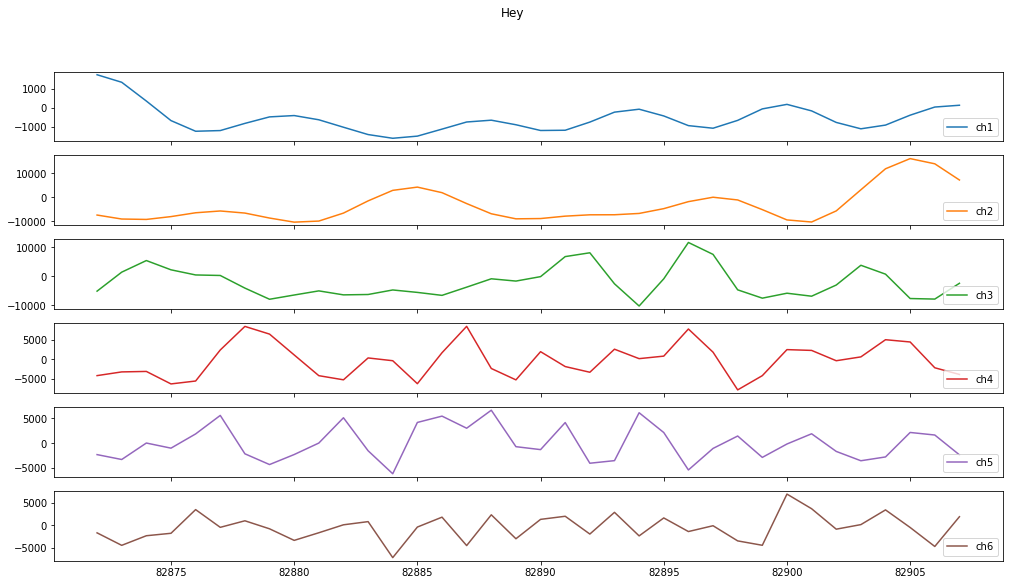

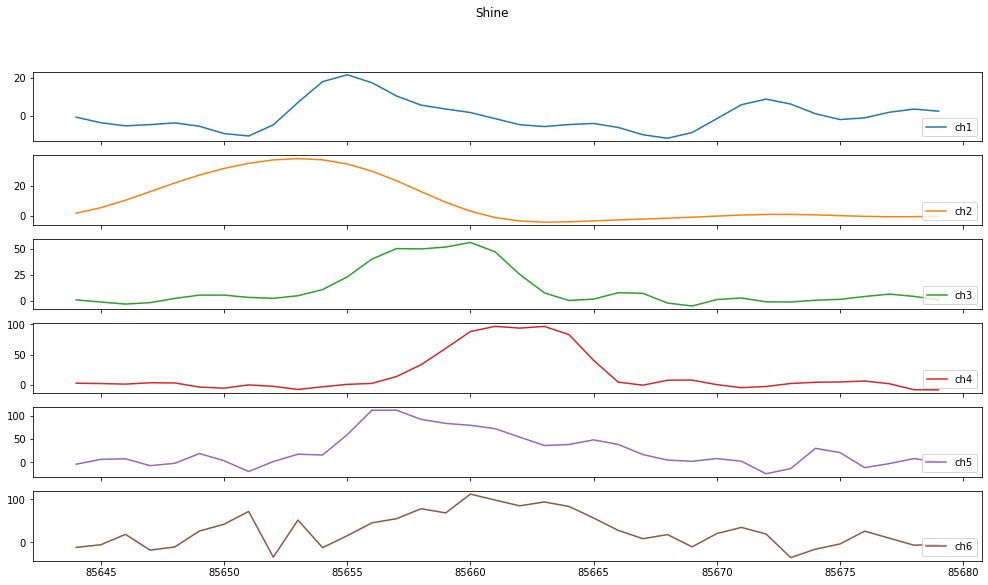

In [ ]:
for class_name in classes_list:
  inspect_activity(class_name, df)

#Try data Augmentation

###Random Trasformations

In [ ]:
def jitter(x, sigma=0.3):
    # https://arxiv.org/pdf/1706.00527.pdf
    return x + np.random.normal(loc=0., scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    # https://arxiv.org/pdf/1706.00527.pdf
    factor = np.random.normal(loc=1., scale=sigma, size=(x.shape[0],x.shape[2]))
    return np.multiply(x, factor[:,np.newaxis,:])

def rotation(x):
    flip = np.random.choice([-1, 1], size=(x.shape[0],x.shape[1]))
    rotate_axis = np.arange(x.shape[1])
    np.random.shuffle(rotate_axis)    
    return flip[:,np.newaxis,:] * x[:,:,rotate_axis]

In [ ]:
def permutation(x, max_segments=5, seg_mode="equal"):
    orig_steps = np.arange(x.shape[1])
    
    num_segs = np.random.randint(1, max_segments, size=(x.shape[0]))
    
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        if num_segs[i] > 1:
            if seg_mode == "random":
                split_points = np.random.choice(x.shape[1]-2, num_segs[i]-1, replace=False)
                split_points.sort()
                splits = np.split(orig_steps, split_points)
            else:
                splits = np.array_split(orig_steps, num_segs[i])
            warp = np.concatenate(np.random.permutation(splits)).ravel()
            ret[i] = pat[warp]
        else:
            ret[i] = pat
    return ret

In [ ]:
def magnitude_warp(x, sigma=0.2, knot=4):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[1])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(x.shape[0], knot+2, x.shape[2]))
    warp_steps = (np.ones((x.shape[2],1))*(np.linspace(0, x.shape[1]-1., num=knot+2))).T
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        warper = np.array([CubicSpline(warp_steps[:,dim], random_warps[i,:,dim])(orig_steps) for dim in range(x.shape[2])]).T
        ret[i] = pat * warper

    return ret

def time_warp(x, sigma=0.2, knot=4):
    from scipy.interpolate import CubicSpline
    orig_steps = np.arange(x.shape[1])
    
    random_warps = np.random.normal(loc=1.0, scale=sigma, size=(x.shape[0], knot+2, x.shape[2]))
    warp_steps = (np.ones((x.shape[2],1))*(np.linspace(0, x.shape[1]-1., num=knot+2))).T
    
    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        for dim in range(x.shape[2]):
            time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps[i,:,dim])(orig_steps)
            scale = (x.shape[1]-1)/time_warp[-1]
            ret[i,:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, x.shape[1]-1), pat[:,dim]).T
    return ret

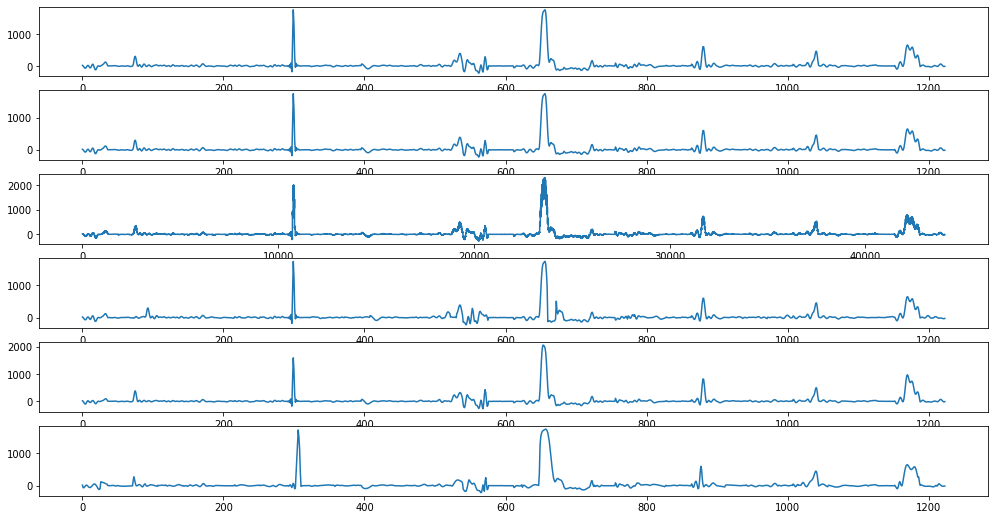

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(17,9))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax1.plot(np.array(x[0:34,:,0]).reshape(34*36))
ax2.plot(jitter(x[0:34,:,0]).reshape(34*36))
ax3.plot(scaling(x[:34,:,0].reshape(34,36,1)).reshape(44064))
ax4.plot(permutation(x[:34,:,0]).reshape(34*36))
axes[4].plot(magnitude_warp(x[:34,:,0].reshape(34,36,1)).reshape(34*36))
axes[5].plot(time_warp(x[:34,:,0].reshape(34,36,1)).reshape(34*36))

In [ ]:
x[:34,:,0]

array([[ 1.7597e+01,  2.2974e-01, -2.9654e+01, ...,  1.1982e+02,
         9.1591e+01,  4.3719e+01],
       [ 2.4209e+00,  1.6847e+00,  5.0692e-01, ..., -1.5618e+01,
        -1.0702e+01, -4.6352e+00],
       [ 3.9688e+01,  1.6399e+02,  2.7545e+02, ...,  3.1521e+01,
         2.5363e+01,  1.2557e+01],
       ...,
       [ 1.0272e+01,  1.4161e+01,  1.1972e+01, ...,  7.4400e-01,
        -3.6496e-01, -2.5712e+00],
       [ 1.2609e+01, -2.9453e+01, -7.6643e+01, ...,  3.2209e+02,
         2.3747e+02,  1.1241e+02],
       [-1.8979e+01, -7.8491e+00,  8.8483e+00, ..., -1.4862e+01,
        -1.8837e+01, -1.1207e+01]])

In [ ]:
np.array(x[0:27,:,0]).reshape(27*36)

array([ 1.7597e+01,  2.2974e-01, -2.9654e+01, -5.9210e+01, -7.2064e+01,
       -5.8355e+01, -2.4086e+01,  9.5313e+00,  1.9020e+01, -3.3500e+00,
       -4.0648e+01, -6.1347e+01, -4.3567e+01,  4.9636e+00,  4.9192e+01,
        5.2197e+01,  4.6215e+00, -6.6308e+01, -1.1657e+02, -1.1812e+02,
       -7.7840e+01, -2.8137e+01,  7.5407e-01,  2.2877e+00, -7.7249e+00,
       -1.0118e+01,  8.0155e-01,  1.7232e+01,  3.1031e+01,  4.3985e+01,
        6.4090e+01,  9.2687e+01,  1.1742e+02,  1.1982e+02,  9.1591e+01,
        4.3719e+01,  2.4209e+00,  1.6847e+00,  5.0692e-01, -2.6783e-01,
       -2.2870e-02,  1.2441e+00,  3.1347e+00,  5.2318e+00,  7.2639e+00,
        8.8872e+00,  9.4003e+00,  7.8662e+00,  3.7614e+00, -2.2936e+00,
       -8.4056e+00, -1.2201e+01, -1.2153e+01, -8.5675e+00, -3.5379e+00,
        1.8950e-01,  7.4145e-01, -1.8715e+00, -5.8312e+00, -8.5859e+00,
       -8.2939e+00, -4.8550e+00, -1.0226e-02,  3.5335e+00,  3.5181e+00,
       -6.2294e-01, -7.3552e+00, -1.3743e+01, -1.6928e+01, -1.56

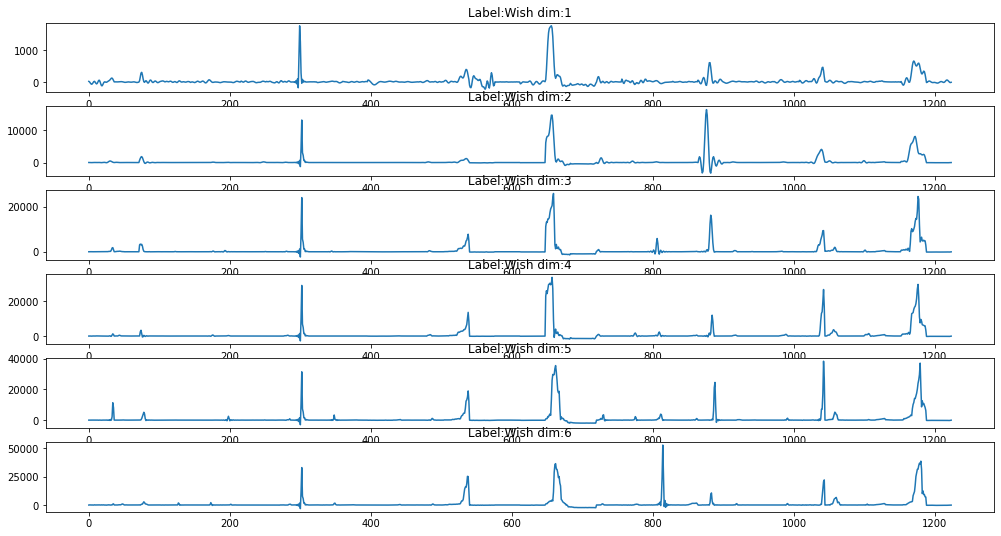

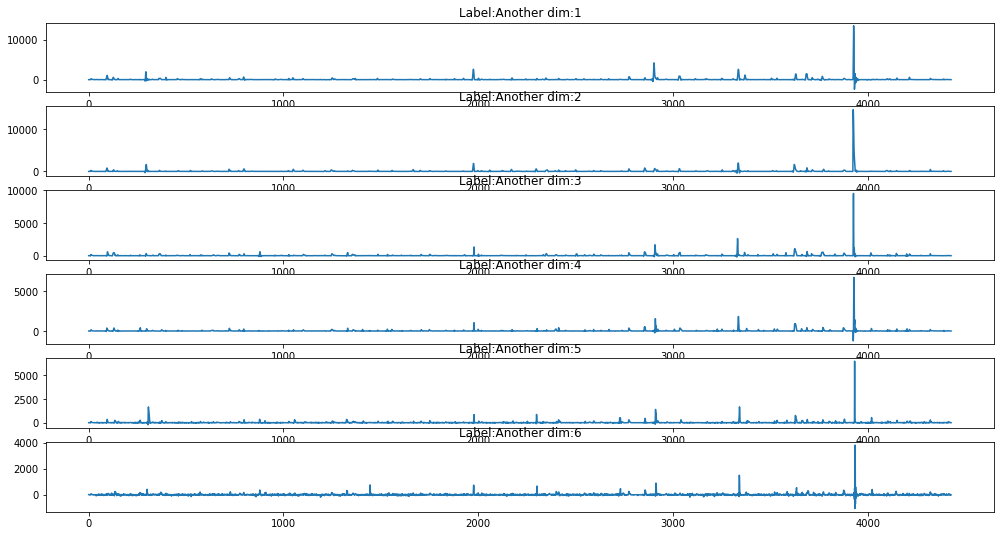

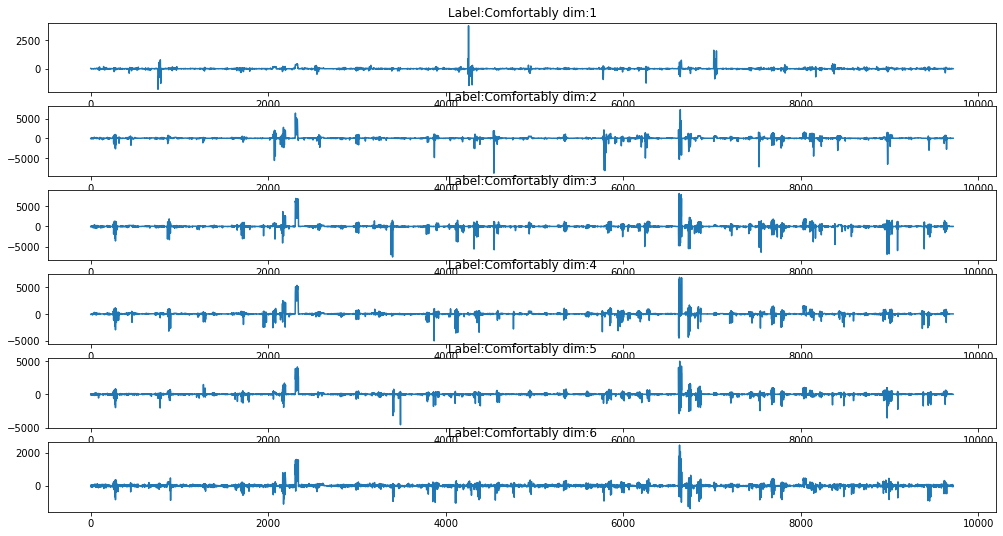

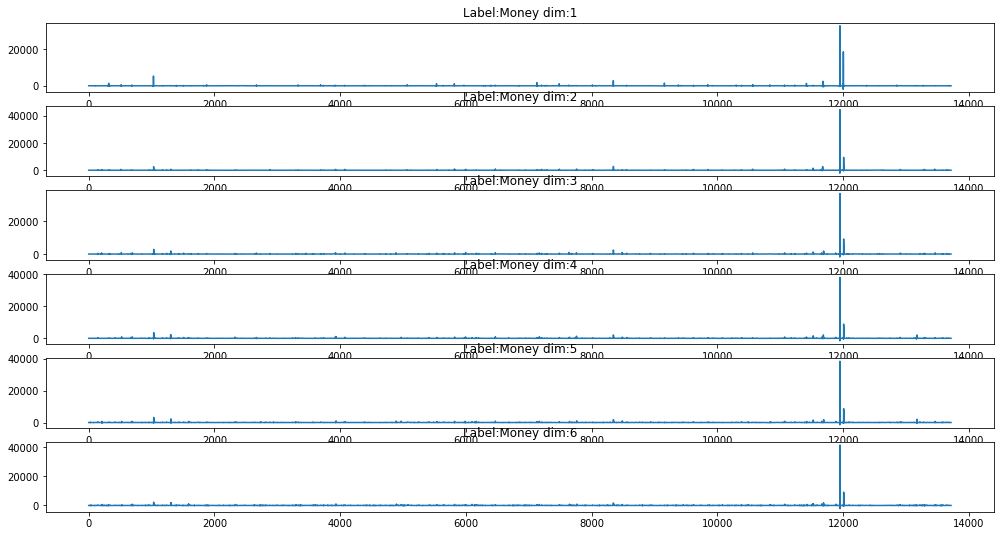

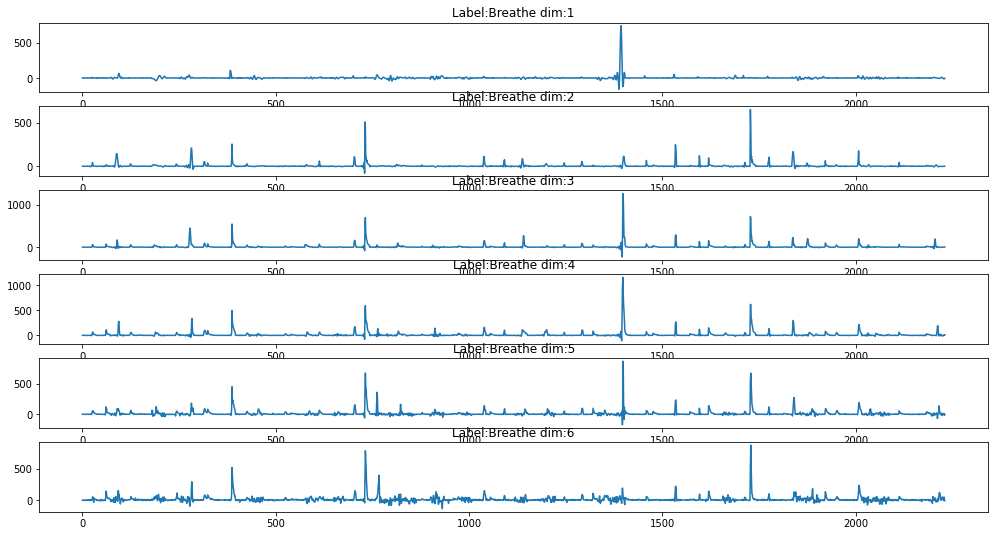

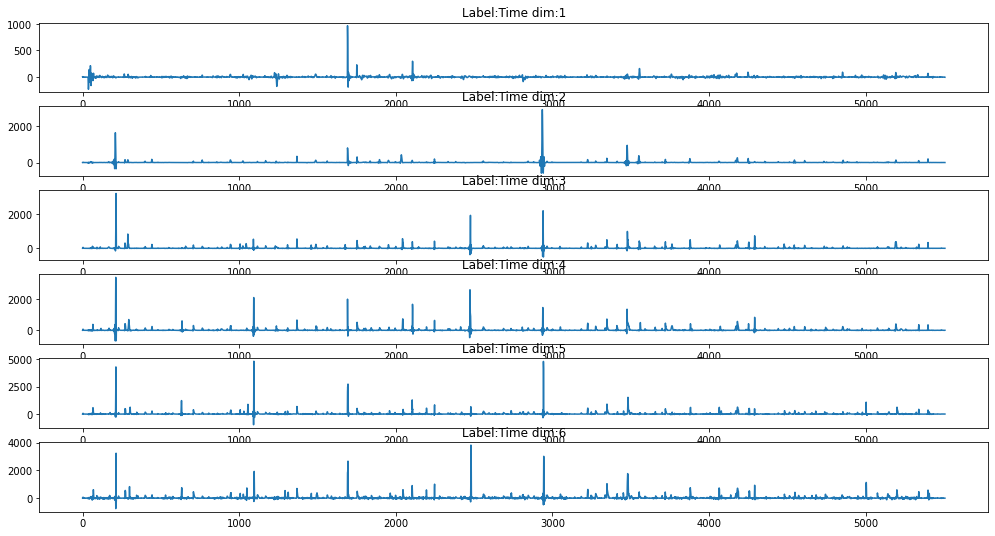

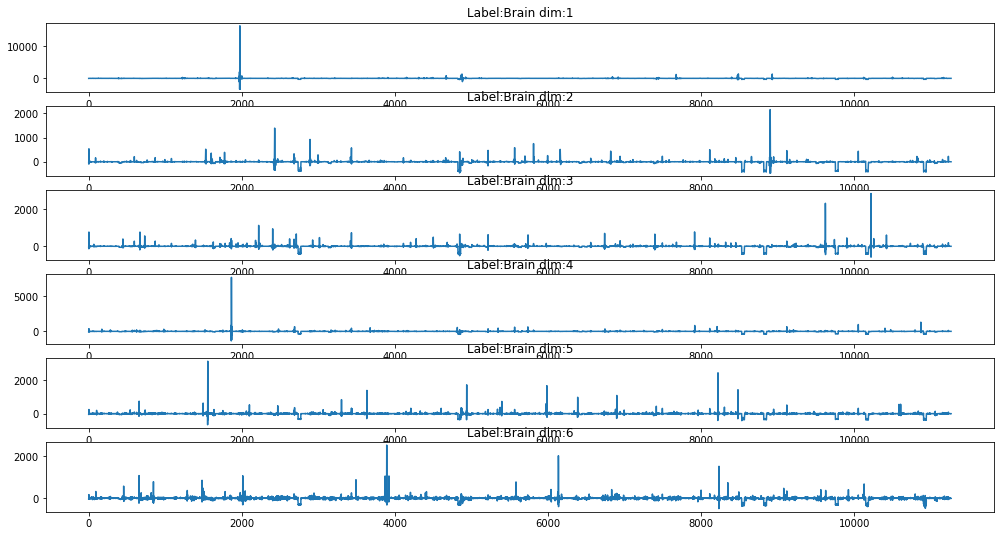

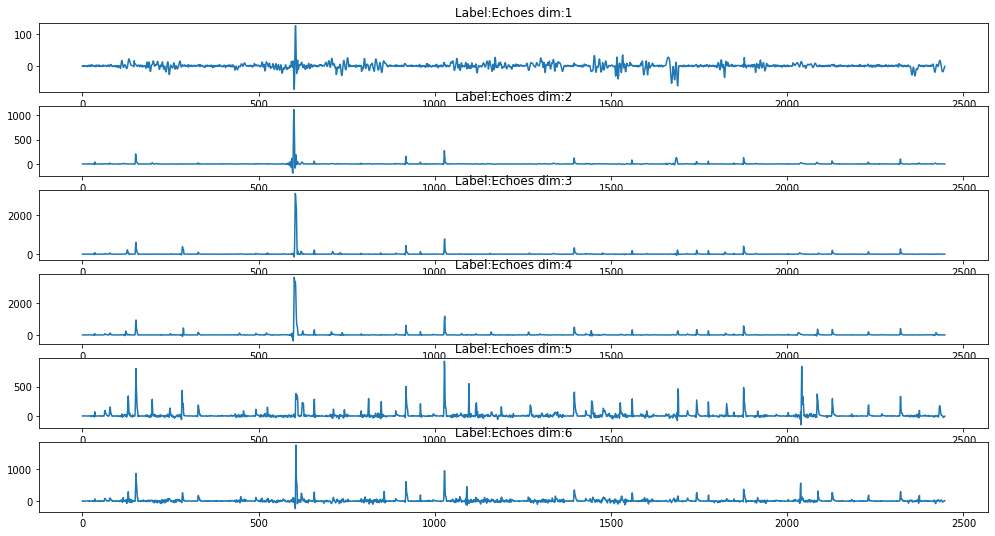

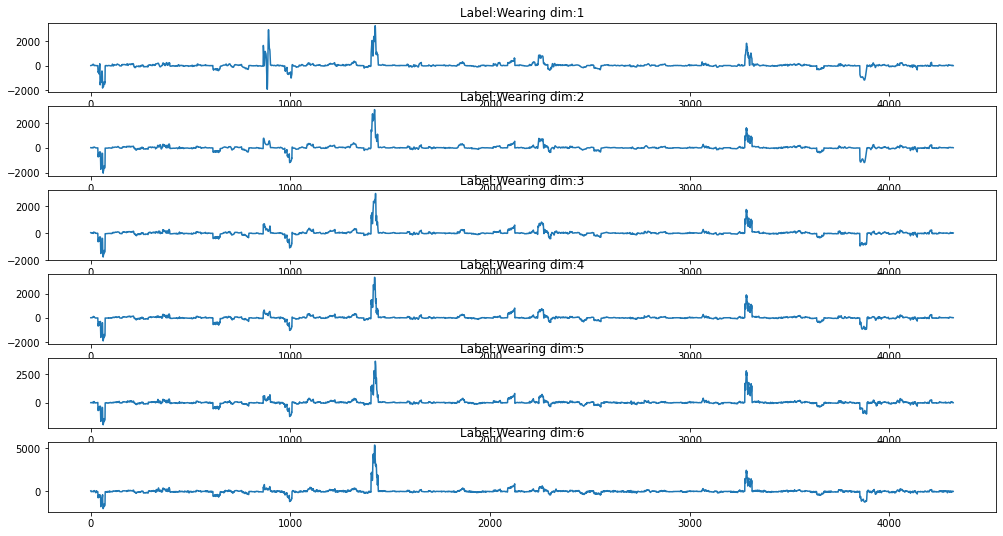

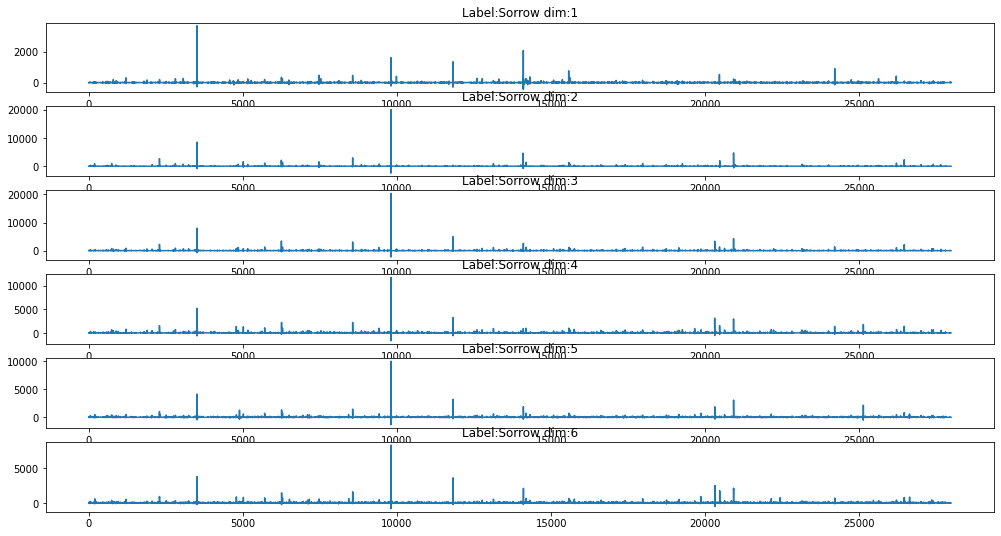

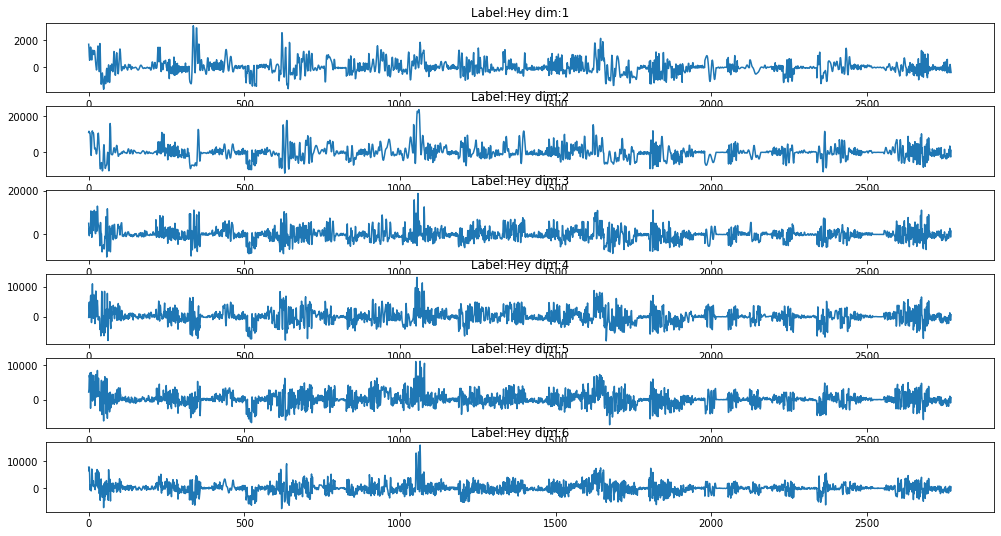

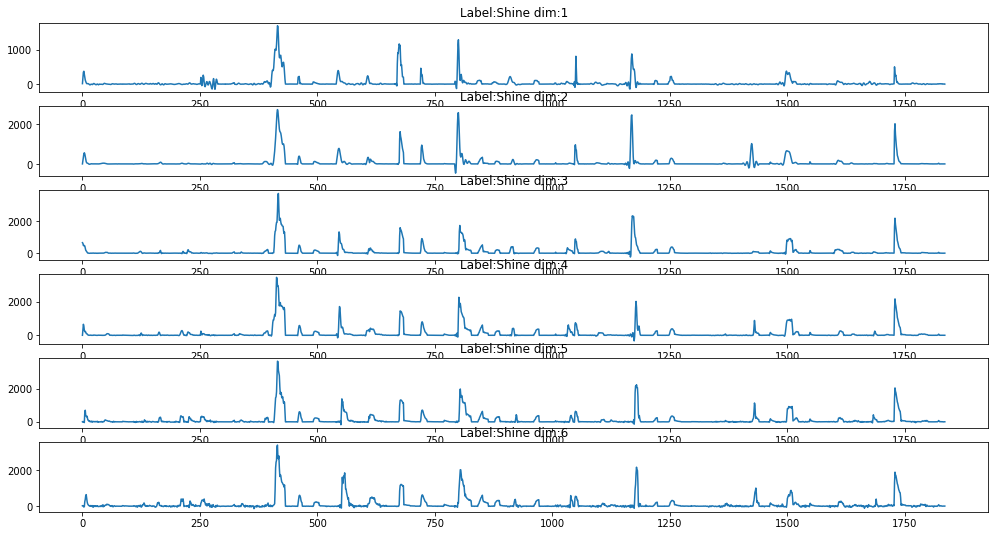

In [ ]:
num_row = x.shape[2]
num_col = 1

row = 0
for label in range(len(classes_list)):
  fig, axes = plt.subplots(num_row, num_col, figsize=(17,9))
  num = count[label]
  for i in range(x.shape[2]):
    data = np.array(x[row:num+row,:,i]).reshape(num*36)
    ax = axes[i]
    ax.set_title("Label:" +classes_list[label]+ " dim:"+str(i+1))
    ax.plot(data)
  row += num

In [ ]:
x_train[:][:][0]

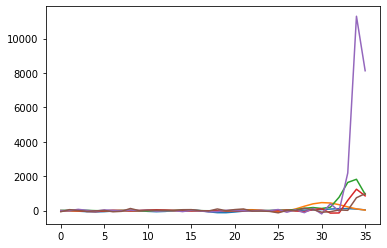

In [ ]:
plt.plot(x_train[0])

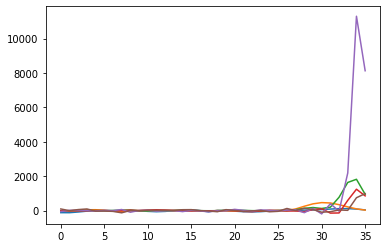

In [ ]:
plt.plot(permutation(x_train)[0])

###SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
dim_1 = np.array(x_train).shape[0]
dim_2 = np.array(x_train).shape[1]
dim_3 = np.array(x_train).shape[2]
print(dim_1, dim_2, dim_3)

1938 36 6


In [ ]:
new_dim = dim_1 * dim_2

new_x_train = np.array(x_train).reshape(new_dim, dim_3)
print(new_x_train.shape)

(69768, 6)


In [ ]:
new_y_train = []
for i in range(len(y_train)):
    # print(y_train[i])
    new_y_train.extend([y_train[i]]*dim_2)

new_y_train = np.array(new_y_train)

print(new_y_train, new_y_train.shape)

[ 0.  0.  0. ... 11. 11. 11.] (69768,)


In [ ]:
# transform the dataset
oversample = SMOTE()
X_Train, Y_Train = oversample.fit_resample(new_x_train, new_y_train)
# summarize the new class distribution
counter = Counter(Y_Train)
print('The number of samples in TRAIN: ', counter)

The number of samples in TRAIN:  Counter({0.0: 22356, 1.0: 22356, 2.0: 22356, 3.0: 22356, 4.0: 22356, 5.0: 22356, 6.0: 22356, 7.0: 22356, 8.0: 22356, 9.0: 22356, 10.0: 22356, 11.0: 22356})


In [ ]:
x_train_SMOTE = X_Train.reshape(int(X_Train.shape[0]/dim_2), dim_2, dim_3)
print(x_train_SMOTE.shape)

(7452, 36, 6)


In [ ]:
y_train_SMOTE = []
for i in range(int(X_Train.shape[0]/dim_2)):
    # print(i)
    value_list = list(Y_Train.reshape(int(X_Train.shape[0]/dim_2), dim_2)[i])
    # print(list(set(value_list)))
    y_train_SMOTE.extend(list(set(value_list)))
    ## Check: if there is any different value in a list 
    if len(set(value_list)) != 1:
        print('\n\n********* STOP: THERE IS SOMETHING WRONG IN TRAIN ******\n\n')
    

In [ ]:
print(y_train_SMOTE, len(y_train_SMOTE))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,

In [ ]:
counter = Counter(y_train_SMOTE)
print('The number of samples in TRAIN: ', counter)

The number of samples in TRAIN:  Counter({0.0: 621, 1.0: 621, 2.0: 621, 3.0: 621, 4.0: 621, 5.0: 621, 6.0: 621, 7.0: 621, 8.0: 621, 9.0: 621, 10.0: 621, 11.0: 621})


In [ ]:
y_train_SMOTE = np.array(y_train_SMOTE)
print(y_train_SMOTE, y_train_SMOTE.shape)

[ 0.  0.  0. ... 11. 11. 11.] (7452,)


In [ ]:
counter = Counter(y_train_SMOTE)
tot_number = 0;

for i in range(len(classes_list)):
  count[i] = counter[i]
  tot_number += count[i]
  print("The number of ", classes_list[i], " is: ", count[i])

print("The total number of data is: ", tot_number)

The number of  Wish  is:  621
The number of  Another  is:  621
The number of  Comfortably  is:  621
The number of  Money  is:  621
The number of  Breathe  is:  621
The number of  Time  is:  621
The number of  Brain  is:  621
The number of  Echoes  is:  621
The number of  Wearing  is:  621
The number of  Sorrow  is:  621
The number of  Hey  is:  621
The number of  Shine  is:  621
The total number of data is:  7452


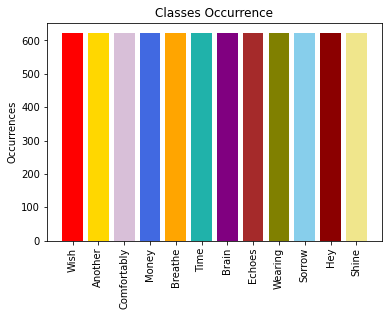

In [ ]:
erc = ['red', 'gold', 'thistle', 'royalblue', 'orange', 'lightseagreen', 'purple', 'brown', 'olive', 'skyblue', 'darkred', 'khaki']
plt.bar(classes_list, count, color = erc)
plt.title("Classes Occurrence")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)
plt.yticks
plt.show()

###GAN

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape, n_classes=6):
    
    input = tfkl.Input(shape=in_shape)
    # downsample to 14x14
    fe = tfkl.Conv1D(16, 3, strides=2, padding='same')(input)
    fe = tfkl.LeakyReLU(alpha=0.2)(fe)
    fe = tfkl.Dropout(0.2)(fe)
    # normal
    fe = tfkl.Conv1D(32, 3, strides=2, padding='same')(fe)
    fe = tfkl.BatchNormalization()(fe)
    fe = tfkl.LeakyReLU(alpha=0.2)(fe)
    fe = tfkl.Dropout(0.2)(fe)
    # downsample to 7x7
    fe = tfkl.Conv1D(64, 3, strides=2, padding='same')(fe)
    fe = tfkl.BatchNormalization()(fe)
    fe = tfkl.LeakyReLU(alpha=0.2)(fe)
    fe = tfkl.Dropout(0.2)(fe)
    
    #downsample one more
    fe = tfkl.Conv1D(128, 3, strides=2, padding='same')(fe)
    fe = tfkl.BatchNormalization()(fe)
    fe = tfkl.LeakyReLU(alpha=0.2)(fe)
    fe = tfkl.Dropout(0.2)(fe)
   
    # flatten feature maps
    fe = tfkl.Flatten()(fe)
    # real/fake output
    out1 = tfkl.Dense(1, activation='sigmoid')(fe)
    # class label output
    out2 = tfkl.Dense(n_classes, activation='softmax')(fe)
    # define model
    model = tfk.Model(input, [out1, out2])
    # compile model
    opt = tfk.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
    model.summary()
    return model

In [ ]:
discriminator = define_discriminator(input_shape)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 36, 6)]      0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 18, 16)       304         ['input_4[0][0]']                
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)      (None, 18, 16)       0           ['conv1d_4[0][0]']               
                                                                                                  
 dropout_4 (Dropout)            (None, 18, 16)       0           ['leaky_re_lu_4[0][0]']          
                                                                                            

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=6):
    # weight initialization
    #init = RandomNormal(stddev=0.02)
    depth = 32 #32
    ks = 3
    dropout = 0.25
    dim = 96 #
    # 
    # label input
    in_label = tfkl.Input(shape=(1,))
    # embedding for categorical input
    li = tfkl.Embedding(n_classes, 50)(in_label)
    # linear multiplication
    n_nodes = 96 * 1
    li = tfkl.Dense(n_nodes)(li)
    
    # reshape to additional channel
    li = tfkl.Reshape((96, 1, 1))(li)
    # image generator input
    in_lat = tfkl.Input(shape=(latent_dim,))
    # foundation for 7x7 image
    n_nodes = dim*depth
    gen = tfkl.Dense(n_nodes)(in_lat)
    gen = tfkl.LeakyReLU(alpha=0.2)(gen)
    gen = tfkl.Reshape((dim, 1, depth))(gen)
    # merge image gen and label input
    merge = tfkl.Concatenate()([gen, li]) #gen=96,1,32 x li=96,1,1
    # upsample to 192,1,16
    gen = tfkl.Conv2DTranspose(16, 3, strides=(2,1), padding='same')(merge)
    gen = tfkl.BatchNormalization()(gen)
    gen = tfkl.LeakyReLU(alpha=0.2)(gen)
    
    #upsample to  384,1,8
    gen = tfkl.Conv2DTranspose(8, 3, strides=(2,1), padding='same')(gen)
    gen = tfkl.BatchNormalization()(gen)
    gen = tfkl.LeakyReLU(alpha=0.2)(gen)
    
    #updamsple
    #gen = Conv2DTranspose(48, (3,3), strides=(2,1), padding='same', kernel_initializer=init)(gen)
    #gen = BatchNormalization()(gen)
    #gen = Activation('relu')(gen)
    #384 x 1 property image
    gen = tfkl.Reshape((384,-1))(gen)
    # upsample to 28x28
    #gen = Conv1DTranspose(1, 3, padding='same', kernel_initializer=init)(gen)
    gen = tfkl.Conv1D(1, 3, strides=1, padding='same')(gen)
    out_layer = tfkl.Activation('tanh')(gen)
    # define model
    model = tfk.Model([in_lat, in_label], out_layer)
    model.summary()
    return model

In [ ]:
generator = define_generator(128)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 3072)         396288      ['input_10[0][0]']               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        300         ['input_9[0][0]']                
                                                                                            

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect the outputs of the generator to the inputs of the discriminator
    gan_output = d_model(g_model.output)
    # define gan model as taking noise and label and outputting real/fake and label outputs
    model = tfk.Model(g_model.input, gan_output)
    # compile model
    opt = tfk.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
    return model

In [ ]:
def make_net(model, n_layers, hidden_units, output_units, net_type='GRU'):
    if net_type=='GRU':
        for i in range(n_layers):
            model.add(GRU(units=hidden_units,
                      return_sequences=True,
                      name=f'GRU_{i + 1}'))
    else:
        for i in range(n_layers):
            model.add(LSTM(units=hidden_units,
                      return_sequences=True,
                      name=f'LSTM_{i + 1}'))

    model.add(Dense(units=output_units,
                    activation='sigmoid',
                    name='OUT'))
    return model

In [ ]:
class Generator(Model):
    def __init__(self, hidden_dim, net_type='GRU'):
        self.hidden_dim = hidden_dim
        self.net_type = net_type

    def build(self, input_shape):
        model = Sequential(name='Generator')
        model.add(Input(shape=input_shape))
        model = make_net(model,
                         n_layers=3,
                         hidden_units=self.hidden_dim,
                         output_units=self.hidden_dim,
                         net_type=self.net_type)
        return model

class Discriminator(Model):
    def __init__(self, hidden_dim, net_type='GRU'):
        self.hidden_dim = hidden_dim
        self.net_type=net_type

    def build(self, input_shape):
        model = Sequential(name='Discriminator')
        model = make_net(model,
                         n_layers=3,
                         hidden_units=self.hidden_dim,
                         output_units=1,
                         net_type=self.net_type)
        return model

# Preprocessing

### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to the useful features
scale_columns = ['ch1', 'ch2', 'ch3','ch4','ch5','ch6']
scaler = MinMaxScaler()
scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

###Standardization

In [ ]:
from sklearn.preprocessing import  StandardScaler
import copy

stdtraindata = copy.deepcopy(df_train)
stdtestdata = copy.deepcopy(df_test)
# Apply MinMaxScaler to the useful features
scale_columns = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6']
stdscaler = StandardScaler()
stdscaler = stdscaler.fit(stdtraindata[scale_columns])

stdtraindata.loc[:, scale_columns] = stdscaler.transform(stdtraindata[scale_columns].to_numpy())
stdtestdata.loc[:, scale_columns] = stdscaler.transform(stdtestdata[scale_columns].to_numpy())

In [ ]:
stdtraindata.head(50)

# Utils functions

In [ ]:
def plot_confusionMatrix(y_test, predictions, label_mapping):
  # Compute the confusion matrix
  cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

  # Compute the classification metrics
  accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
  precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
  print('Accuracy:',accuracy.round(4))
  print('Precision:',precision.round(4))
  print('Recall:',recall.round(4))
  print('F1:',f1.round(4))

  # Plot the confusion matrix
  plt.figure(figsize=(10,8))
  sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()


In [ ]:
# Map labels to integers
label_mapping = {
          'Wish': 0,        # 0
          'Another': 1,      # 1
          'Comfortably': 2,  # 2
          'Money': 3,        # 3
          'Breathe': 4,      # 4
          'Time': 5,         # 5
          'Brain': 6,        # 6
          'Echoes': 7,       # 7
          'Wearing': 8,      # 8
          'Sorrow': 9,       # 9
          'Hey': 10,          # 10
          'Shine': 11
}

Metadata

In [ ]:
window = 36
stride = 36

In [ ]:
def build_sequences(df, window, stride):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for id in df['batch'].unique():
        # Take only meaningful features
        temp = df[df['batch'] == id][['ch1','ch2','ch3','ch4','ch5','ch6']].values
        # Save the label
        label = df[df['batch'] == id]['label'].values[0]
        # Compute padding length
        padding_len = window - len(temp)%window
        # Create padding and concatenate it
        padding = np.zeros((padding_len,6), dtype='float64')
        temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [ ]:
def build_sequences(window, stride, num_batches):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for id in range(num_batches):
        # Take only meaningful features
        temp = x_train[id]
        # Save the label
        label = y_train[id]
        # Compute padding length
        padding_len = window - len(temp)%window
        # Create padding and concatenate it
        padding = np.zeros((padding_len,6), dtype='float64')
        temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [ ]:
X_train, y_train = build_sequences(stdtraindata, window, stride)
X_test, y_test = build_sequences(stdtestdata, window, stride)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1940, 36, 6), (1940,), (489, 36, 6), (489,))

##Size and metadata

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1938, 36, 6), (1938,), (491, 36, 6), (491,))

In [ ]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1938, 36, 6), (1938, 12), (491, 36, 6), (491, 12))

In [ ]:
input_shape = x_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 32
epochs = 200

In [ ]:
x_train_SMOTE.shape, y_train_SMOTE.shape, x_test.shape, y_test.shape

((7452, 36, 6), (7452,), (491, 36, 6), (491,))

In [ ]:
# Convert the sparse labels to categorical values
y_train_SMOTE = tfk.utils.to_categorical(y_train_SMOTE)
y_test = tfk.utils.to_categorical(y_test)
x_train_SMOTE.shape, y_train_SMOTE.shape, x_test.shape, y_test.shape

((7452, 36, 6), (7452, 12), (491, 36, 6), (491, 12))

In [ ]:
input_shape = x_train_SMOTE.shape[1:]
classes = y_train_SMOTE.shape[-1]
batch_size = 32
epochs = 200

#LSTM

In [ ]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
def build_CONV_LSTM_model(input_shape, classes):
  # Build the neural network layer by layer
  input_layer = tfkl.Input(shape=input_shape, name='Input')
  convlstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
  convlstm = tfkl.Conv1D(256, 3, padding='same', activation='relu')(convlstm)
  convlstm = tfkl.MaxPool1D()(convlstm)
  convlstm = tfkl.Bidirectional(tfkl.LSTM(256, return_sequences=True))(convlstm)    
  convlstm = tfkl.Conv1D(512, 3, padding='same', activation='relu')(convlstm)
  convlstm = tfkl.GlobalAveragePooling1D()(convlstm)
  convlstm = tfkl.Dropout(.5)(convlstm)
  classifier = tfkl.Dense(128, activation='relu')(convlstm)
  output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

  # Connect input and output through the Model class
  model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

  # Compile the model
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

  # Return the model
  return model

In [ ]:
model = build_CONV_LSTM_model(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 36, 256)          138240    
 l)                                                              
                                                                 
 conv1d_40 (Conv1D)          (None, 36, 256)           196864    
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 18, 256)          0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirectio  (None, 18, 512)          1050624   
 nal)                                                            
                                                             

In [ ]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 lstm_18 (LSTM)              (None, 36, 128)           69120     
                                                                 
 lstm_19 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 12)                1548      
                                                                 
Total params: 218,764
Trainable params: 218,764
Non-trainable

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 12s 133ms/step - loss: 1.8930 - accuracy: 0.3756 - val_loss: 1.5255 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 7s 115ms/step - loss: 1.4257 - accuracy: 0.5031 - val_loss: 1.3004 - val_accuracy: 0.5193 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 7s 119ms/step - loss: 1.2501 - accuracy: 0.5593 - val_loss: 1.2332 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 7s 116ms/step - loss: 1.1228 - accuracy: 0.6120 - val_loss: 1.2053 - val_accuracy: 0.5906 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 7s 116ms/step - loss: 0.9971 - accuracy: 0.6605 - val_loss: 1.1238 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 7s 115ms/step - loss: 0.9174 - accuracy: 0.6914 - val_loss: 1.1208 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 7/200
61/61 [==============================] - 7s 118ms/s

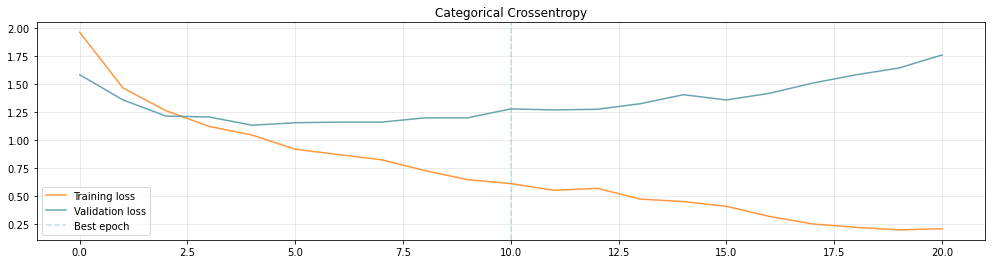

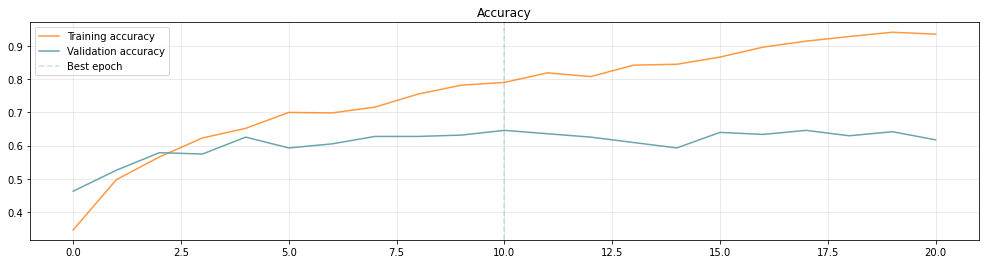

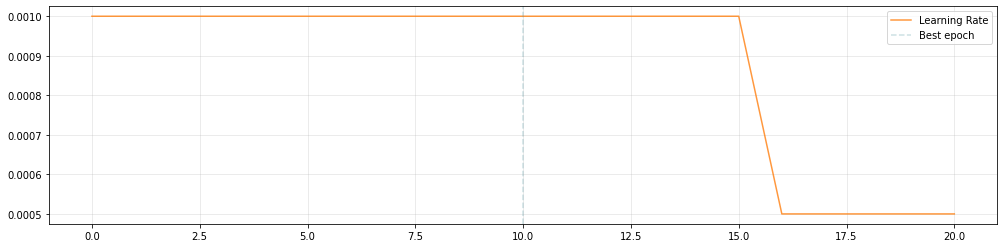

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Save best epoch model
model.save("LSTM")

In [ ]:
# Predict the test set with the LSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 36ms/step


(491, 12)

Accuracy: 0.6456
Precision: 0.5135
Recall: 0.4972
F1: 0.4933


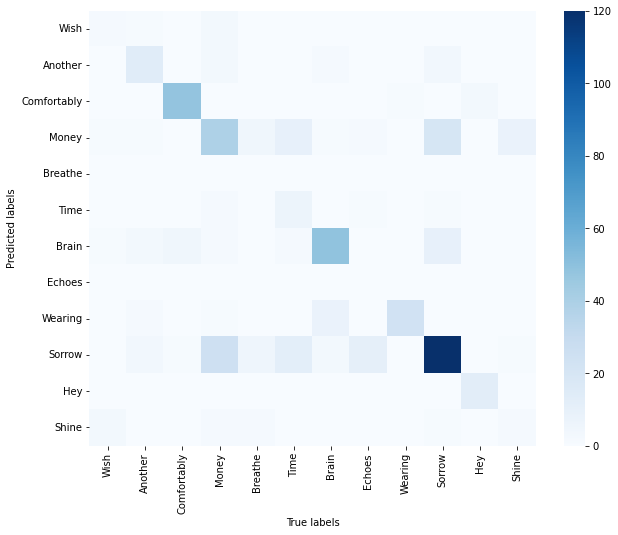

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

With data augmentation

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 31s 117ms/step - loss: 1.0696 - accuracy: 0.6268 - val_loss: 1.3585 - val_accuracy: 0.5499 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 26s 113ms/step - loss: 0.5917 - accuracy: 0.7983 - val_loss: 1.2113 - val_accuracy: 0.5927 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 27s 116ms/step - loss: 0.4791 - accuracy: 0.8367 - val_loss: 1.2083 - val_accuracy: 0.5967 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 27s 118ms/step - loss: 0.4213 - accuracy: 0.8567 - val_loss: 1.1849 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 28s 122ms/step - loss: 0.3739 - accuracy: 0.8743 - val_loss: 1.2104 - val_accuracy: 0.6069 - lr: 0.0010
Epoch 6/200
233/233 [==============================] - 26s 112ms/step - loss: 0.3366 - accuracy: 0.8874 - val_loss: 1.1606 - val_accuracy: 0.6314 - lr: 0.0010
Epoch 7/200
233/233 [=========================

In [ ]:
# Predict the test set with the LSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 35ms/step


(491, 12)

Accuracy: 0.6802
Precision: 0.6847
Recall: 0.5453
F1: 0.5773


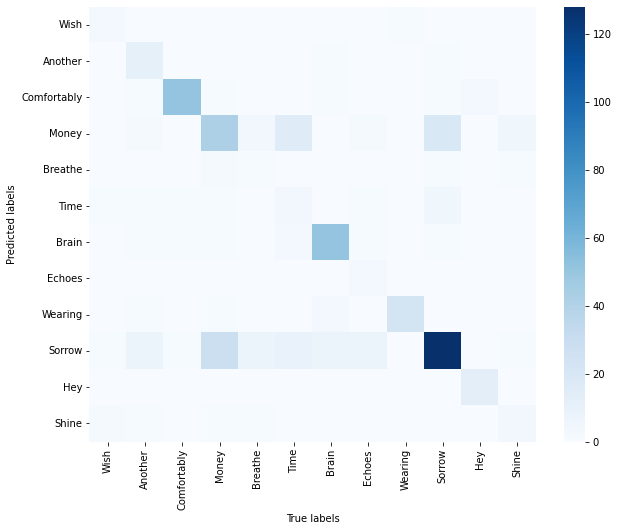

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

second build model

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 128s 510ms/step - loss: 0.8762 - accuracy: 0.6908 - val_loss: 1.2793 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 100s 431ms/step - loss: 0.4878 - accuracy: 0.8328 - val_loss: 1.1624 - val_accuracy: 0.6375 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 104s 445ms/step - loss: 0.3981 - accuracy: 0.8627 - val_loss: 1.2425 - val_accuracy: 0.6069 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 100s 428ms/step - loss: 0.3315 - accuracy: 0.8838 - val_loss: 1.1216 - val_accuracy: 0.6191 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 102s 439ms/step - loss: 0.2979 - accuracy: 0.8972 - val_loss: 1.1148 - val_accuracy: 0.6599 - lr: 0.0010
Epoch 6/200
233/233 [==============================] - 102s 437ms/step - loss: 0.2593 - accuracy: 0.9141 - val_loss: 1.1360 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 7/200
233/233 [===================

In [ ]:
# Predict the test set with the LSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 3s 97ms/step


(491, 12)

Accuracy: 0.7006
Precision: 0.6774
Recall: 0.5932
F1: 0.6151


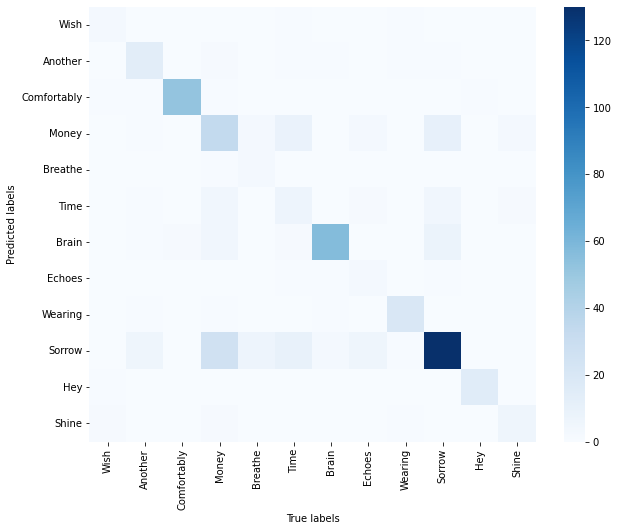

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

In [ ]:
model.save('LSTM_1.h5')

#BiLSTM

In [ ]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 36, 256)          138240    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 12)                1548  

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 19s 399ms/step - loss: 1.8704 - accuracy: 0.3751 - val_loss: 1.4638 - val_accuracy: 0.4969 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 17s 556ms/step - loss: 1.3189 - accuracy: 0.5531 - val_loss: 1.1948 - val_accuracy: 0.5886 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 11s 338ms/step - loss: 1.0829 - accuracy: 0.6290 - val_loss: 1.1538 - val_accuracy: 0.5906 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 10s 338ms/step - loss: 0.9286 - accuracy: 0.6914 - val_loss: 1.0727 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 10s 339ms/step - loss: 0.8279 - accuracy: 0.7141 - val_loss: 1.0495 - val_accuracy: 0.6436 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 11s 343ms/step - loss: 0.7017 - accuracy: 0.7632 - val_loss: 1.0867 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 10s 3

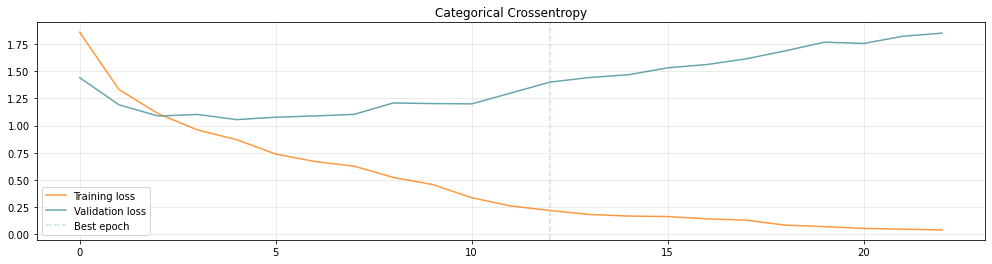

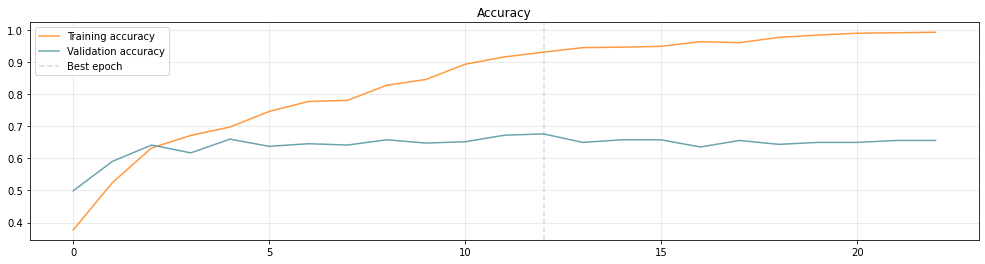

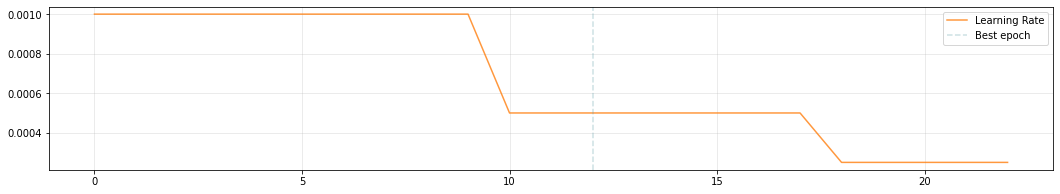

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('BiLSTM_1.h5')

In [ ]:
# Predict the test set with the BiLSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 3s 69ms/step


(491, 12)

Accuracy: 0.6762
Precision: 0.6002
Recall: 0.5255
F1: 0.5437


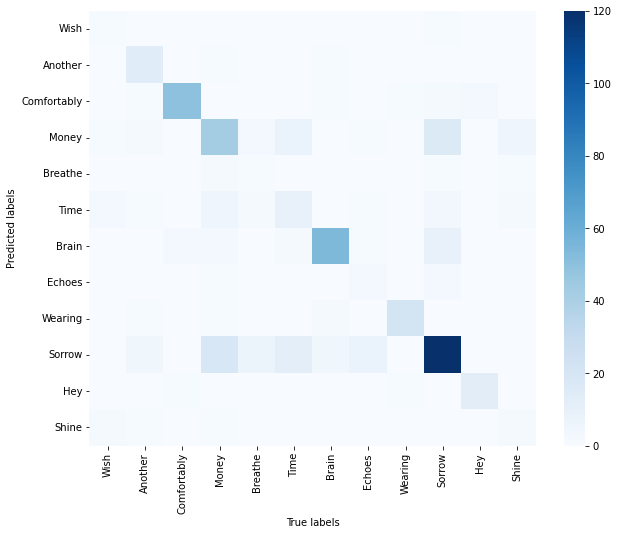

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

batch size 32

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 29s 319ms/step - loss: 1.7244 - accuracy: 0.4350 - val_loss: 1.3376 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 17s 287ms/step - loss: 1.2369 - accuracy: 0.5764 - val_loss: 1.1353 - val_accuracy: 0.6008 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 15s 253ms/step - loss: 1.0319 - accuracy: 0.6502 - val_loss: 1.1160 - val_accuracy: 0.5967 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 16s 271ms/step - loss: 0.9060 - accuracy: 0.6662 - val_loss: 1.0817 - val_accuracy: 0.6069 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 16s 262ms/step - loss: 0.7867 - accuracy: 0.7126 - val_loss: 1.1141 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 21s 336ms/step - loss: 0.6774 - accuracy: 0.7647 - val_loss: 1.0694 - val_accuracy: 0.6314 - lr: 0.0010
Epoch 7/200
61/61 [==============================] - 17s 2

In [ ]:
model.save('BiLSTM_2.h5')

In [ ]:
# Predict the test set with the BiLSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 3s 79ms/step


(491, 12)

Accuracy: 0.6701
Precision: 0.5997
Recall: 0.5348
F1: 0.5548


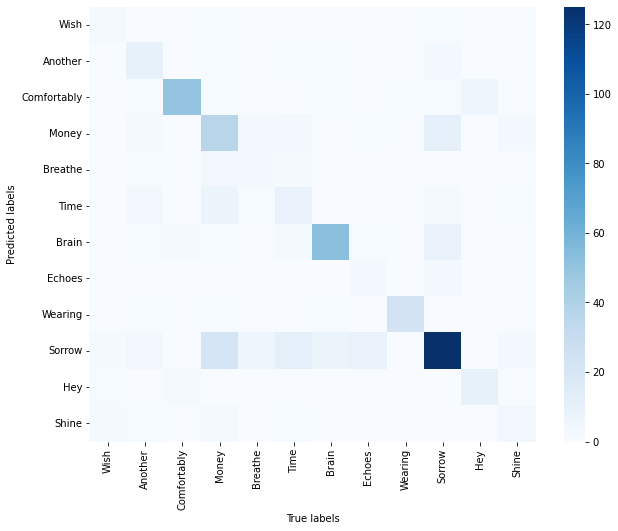

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

with data augmentation

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 73s 285ms/step - loss: 0.9189 - accuracy: 0.6860 - val_loss: 1.1971 - val_accuracy: 0.5804 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 57s 243ms/step - loss: 0.4769 - accuracy: 0.8396 - val_loss: 1.1350 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 57s 245ms/step - loss: 0.3986 - accuracy: 0.8651 - val_loss: 1.0580 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 57s 244ms/step - loss: 0.3389 - accuracy: 0.8838 - val_loss: 1.1120 - val_accuracy: 0.6354 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 60s 257ms/step - loss: 0.2896 - accuracy: 0.9015 - val_loss: 1.0866 - val_accuracy: 0.6436 - lr: 0.0010
Epoch 6/200
233/233 [==============================] - 57s 243ms/step - loss: 0.2430 - accuracy: 0.9149 - val_loss: 1.1559 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 7/200
233/233 [=========================

In [ ]:
model.save('BiLSTM_3.h5')

In [ ]:
# Predict the test set with the BiLSTM
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 3s 80ms/step


(491, 12)

Accuracy: 0.6884
Precision: 0.6541
Recall: 0.5809
F1: 0.6049


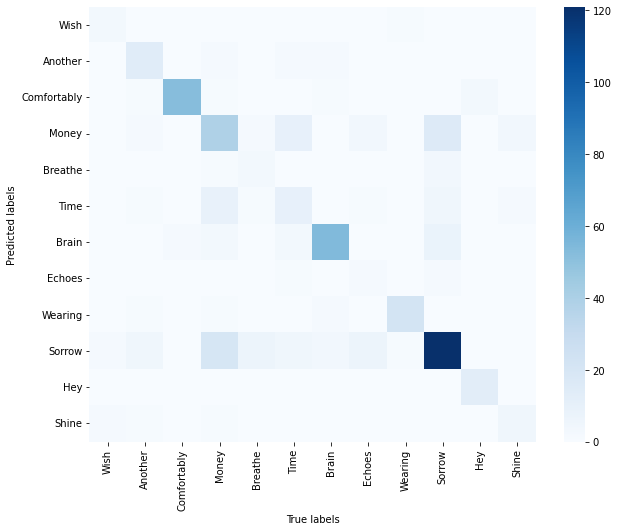

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1D CNN

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(1028,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(1028,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(1028, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d_38 (Conv1D)          (None, 36, 1028)          19532     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 18, 1028)         0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 18, 1028)          3171380   
                                                                 
 global_average_pooling1d_2   (None, 1028)             0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1028)              0     

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 2s 16ms/step - loss: 19.1949 - accuracy: 0.1125 - val_loss: 6.8461 - val_accuracy: 0.0530 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 1s 13ms/step - loss: 6.6310 - accuracy: 0.2002 - val_loss: 4.8124 - val_accuracy: 0.2587 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 1s 13ms/step - loss: 4.2308 - accuracy: 0.2962 - val_loss: 2.4287 - val_accuracy: 0.3931 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 1s 13ms/step - loss: 2.7416 - accuracy: 0.3787 - val_loss: 2.2034 - val_accuracy: 0.4257 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 1s 13ms/step - loss: 2.5160 - accuracy: 0.4014 - val_loss: 2.0636 - val_accuracy: 0.4236 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 1s 12ms/step - loss: 2.1549 - accuracy: 0.3983 - val_loss: 1.9749 - val_accuracy: 0.4114 - lr: 0.0010
Epoch 7/200
61/61 [==============================] - 1s 12ms/step - l

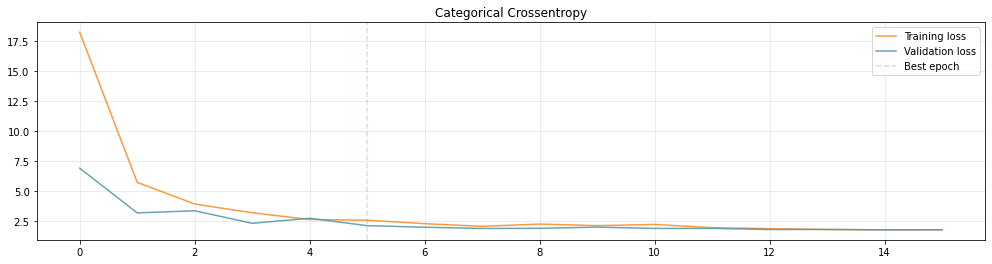

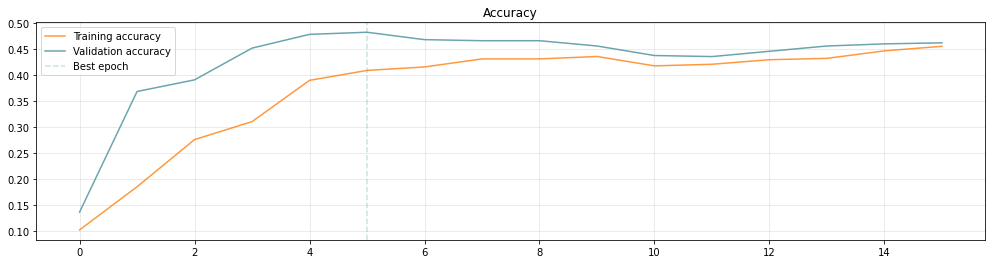

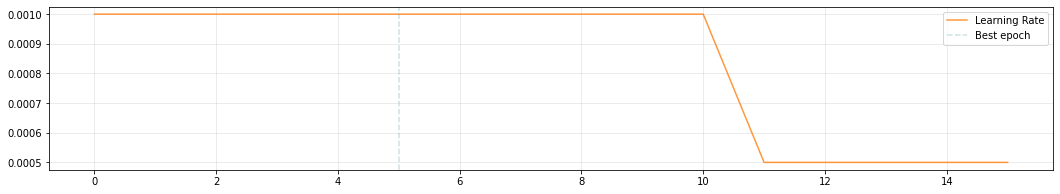

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('1DCNN')

In [ ]:
# Predict the test set with the 1DCNN
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 0s 5ms/step


(491, 12)

Accuracy: 0.611
Precision: 0.5604
Recall: 0.4401
F1: 0.4749


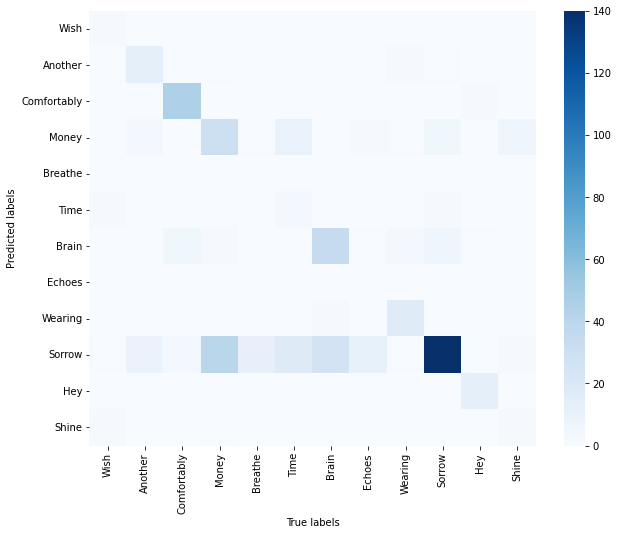

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

with data augmaentation

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 4s 16ms/step - loss: 7.4496 - accuracy: 0.2842 - val_loss: 2.5802 - val_accuracy: 0.1589 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 4s 15ms/step - loss: 1.8428 - accuracy: 0.4337 - val_loss: 2.3350 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 3s 15ms/step - loss: 1.5786 - accuracy: 0.5019 - val_loss: 2.3383 - val_accuracy: 0.2933 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 4s 15ms/step - loss: 1.4543 - accuracy: 0.5361 - val_loss: 2.2157 - val_accuracy: 0.4420 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 6s 24ms/step - loss: 1.3486 - accuracy: 0.5683 - val_loss: 2.1670 - val_accuracy: 0.4888 - lr: 0.0010
Epoch 6/200
233/233 [==============================] - 4s 16ms/step - loss: 1.2457 - accuracy: 0.5918 - val_loss: 1.9204 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 7/200
233/233 [==============================] - 3s 

In [ ]:
# Predict the test set with the 1DCNN
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 0s 4ms/step


(491, 12)

Accuracy: 0.6293
Precision: 0.5793
Recall: 0.5039
F1: 0.5303


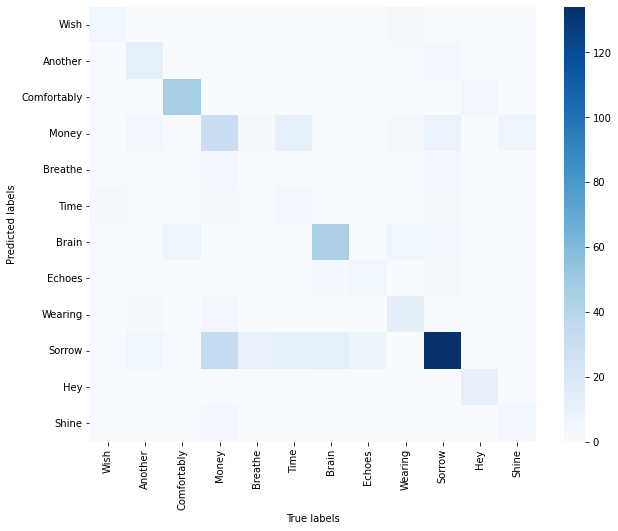

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

Aug data and 256 neurons

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 116s 494ms/step - loss: 21.9460 - accuracy: 0.3293 - val_loss: 2.3316 - val_accuracy: 0.2770 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 111s 477ms/step - loss: 1.6421 - accuracy: 0.5314 - val_loss: 2.3170 - val_accuracy: 0.4929 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 128s 548ms/step - loss: 1.6386 - accuracy: 0.5522 - val_loss: 1.9652 - val_accuracy: 0.4420 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 110s 474ms/step - loss: 1.3968 - accuracy: 0.5849 - val_loss: 2.2991 - val_accuracy: 0.3523 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 115s 492ms/step - loss: 1.3513 - accuracy: 0.5907 - val_loss: 2.6701 - val_accuracy: 0.4358 - lr: 0.0010
Epoch 6/200
233/233 [==============================] - 111s 476ms/step - loss: 1.2326 - accuracy: 0.6185 - val_loss: 2.1156 - val_accuracy: 0.4379 - lr: 0.0010
Epoch 7/200
233/233 [==================

In [ ]:
# Predict the test set with the 1DCNN
predictions = model.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 73ms/step


(491, 12)

Accuracy: 0.7088
Precision: 0.7132
Recall: 0.6066
F1: 0.6461


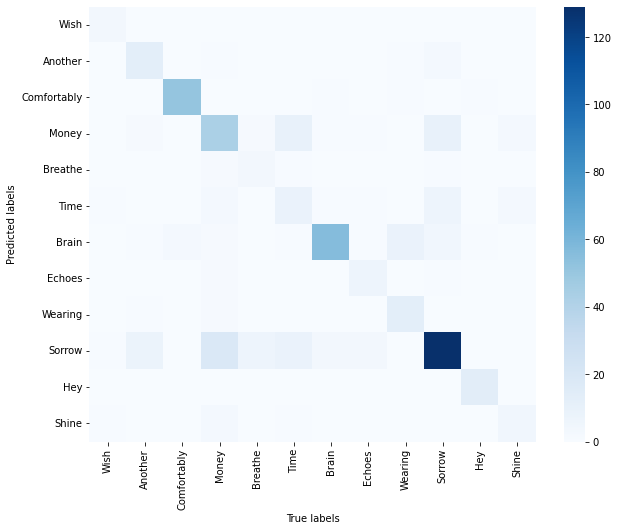

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

In [ ]:
model.save('1DCNN_1.h5')

#1D VGG

In [ ]:
def Conv_1D_Block(x, model_width, kernel):
    # 1D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv1D(model_width, kernel, padding='same', kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [ ]:
class VGG:
    def __init__(self, length, num_channel, num_filters, problem_type, output_nums=1, dropout_rate=False):
        self.length = length
        self.num_channel = num_channel
        self.num_filters = num_filters
        self.problem_type = problem_type
        self.output_nums = output_nums
        self.dropout_rate = dropout_rate

    def VGG11(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG13(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16_v2(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG19(self):
        inputs = tf.keras.Input(self.length)  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

In [ ]:
length = x_train.shape[1:]       # Number of Features (or length of the signal)
model_width = 32                # Number of Filter or Kernels in the Input Layer
num_channel = 1                 # Number of Input Channels
problem_type = 'Classification' # Regression or Classification
class_number = y_train.shape[-1] # Number of Output Class in Classification Mode (>=2)


In [ ]:

length = x_train_SMOTE.shape[1:]       # Number of Features (or length of the signal)
model_width = 32                # Number of Filter or Kernels in the Input Layer
num_channel = 1                 # Number of Input Channels
problem_type = 'Classification' # Regression or Classification
class_number = y_train_SMOTE.shape[-1] # Number of Output Class in Classification Mode (>=2)

##VGG16

In [ ]:
Classification_Model = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=class_number).VGG16() # Change the VGG Model if needed
if class_number == 2:
  Classification_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse','accuracy'])
elif class_number > 2:
  Classification_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])

In [ ]:
Classification_Model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d_57 (Conv1D)          (None, 36, 32)            608       
                                                                 
 batch_normalization_61 (Bat  (None, 36, 32)           128       
 chNormalization)                                                
                                                                 
 activation_49 (Activation)  (None, 36, 32)            0         
                                                                 
 conv1d_58 (Conv1D)          (None, 36, 32)            3104      
                                                                 
 batch_normalization_62 (Bat  (None, 36, 32)           128       
 chNormalization)                                          

In [ ]:
valid_set = (x_test, y_test)

# Train the model
history = Classification_Model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 18s 446ms/step - loss: 2.1294 - mse: 0.0687 - accuracy: 0.3359 - val_loss: 3.3112 - val_mse: 0.0765 - val_accuracy: 0.3218 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 13s 428ms/step - loss: 1.8624 - mse: 0.0650 - accuracy: 0.3885 - val_loss: 2.0775 - val_mse: 0.0670 - val_accuracy: 0.3605 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 13s 430ms/step - loss: 1.7854 - mse: 0.0631 - accuracy: 0.4128 - val_loss: 1.9367 - val_mse: 0.0646 - val_accuracy: 0.3747 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 14s 448ms/step - loss: 1.7456 - mse: 0.0629 - accuracy: 0.4030 - val_loss: 1.9460 - val_mse: 0.0634 - val_accuracy: 0.4053 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 13s 427ms/step - loss: 1.6348 - mse: 0.0596 - accuracy: 0.4381 - val_loss: 2.1407 - val_mse: 0.0666 - val_accuracy: 0.3849 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 13

In [ ]:
# Predict the test set with the 1DCNN
predictions = Classification_Model.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 46ms/step


(491, 12)

Accuracy: 0.609
Precision: 0.5068
Recall: 0.393
F1: 0.4206


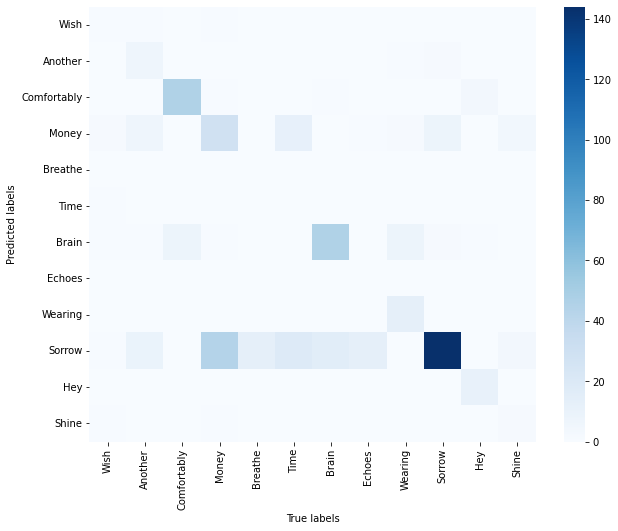

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

with data augmentation

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = Classification_Model.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 93s 371ms/step - loss: 1.8921 - mse: 0.0644 - accuracy: 0.3041 - val_loss: 2.9719 - val_mse: 0.0751 - val_accuracy: 0.3503 - lr: 0.0010
Epoch 2/200
233/233 [==============================] - 76s 327ms/step - loss: 1.6127 - mse: 0.0583 - accuracy: 0.3957 - val_loss: 2.3662 - val_mse: 0.0701 - val_accuracy: 0.3299 - lr: 0.0010
Epoch 3/200
233/233 [==============================] - 75s 321ms/step - loss: 1.4718 - mse: 0.0534 - accuracy: 0.4730 - val_loss: 2.5391 - val_mse: 0.0792 - val_accuracy: 0.2159 - lr: 0.0010
Epoch 4/200
233/233 [==============================] - 77s 331ms/step - loss: 1.2481 - mse: 0.0461 - accuracy: 0.5608 - val_loss: 3.2483 - val_mse: 0.0886 - val_accuracy: 0.1731 - lr: 0.0010
Epoch 5/200
233/233 [==============================] - 78s 335ms/step - loss: 1.1409 - mse: 0.0421 - accuracy: 0.6019 - val_loss: 2.5318 - val_mse: 0.0720 - val_accuracy: 0.3585 - lr: 0.0010
Epoch 6/200
233/233 [========================

In [ ]:
Classification_Model.save('VGG16_1.h5')

In [ ]:
# Predict the test set with the 1DCNN
predictions = Classification_Model.predict(x_test)
predictions.shape

16/16 [==============================] - 2s 86ms/step


(491, 12)

Accuracy: 0.6191
Precision: 0.558
Recall: 0.4711
F1: 0.4939


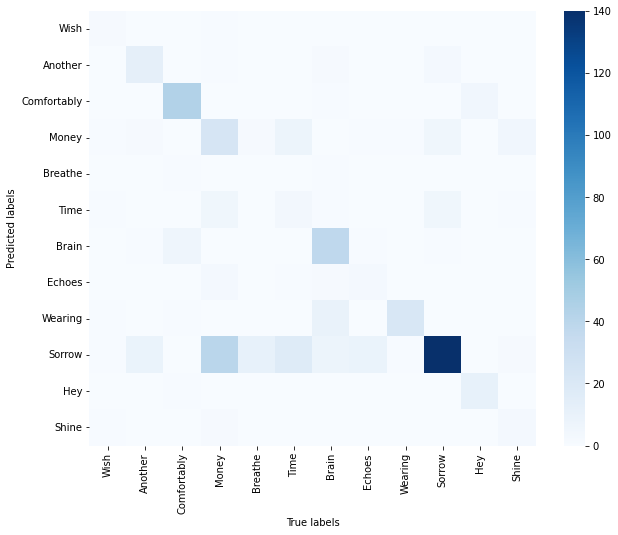

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

##VGG11

In [ ]:
vgg11 = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=class_number).VGG11() # Change the VGG Model if needed
vgg11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])

In [ ]:
vgg11.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 36, 32)            608       
                                                                 
 batch_normalization (BatchN  (None, 36, 32)           128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 36, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            6208  

In [ ]:
valid_set = (x_test, y_test)

# Train the model
history = vgg11.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 21s 288ms/step - loss: 2.1783 - mse: 0.0689 - accuracy: 0.3261 - val_loss: 2.1467 - val_mse: 0.0684 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 18s 295ms/step - loss: 1.8810 - mse: 0.0653 - accuracy: 0.3787 - val_loss: 2.1348 - val_mse: 0.0680 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 18s 295ms/step - loss: 1.7667 - mse: 0.0630 - accuracy: 0.3999 - val_loss: 1.9648 - val_mse: 0.0684 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 20s 320ms/step - loss: 1.6597 - mse: 0.0593 - accuracy: 0.4561 - val_loss: 2.1743 - val_mse: 0.0693 - val_accuracy: 0.3849 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 18s 294ms/step - loss: 1.5295 - mse: 0.0568 - accuracy: 0.4649 - val_loss: 2.1192 - val_mse: 0.0661 - val_accuracy: 0.3951 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 18

In [ ]:
# Predict the test set with the 1DCNN
predictions = vgg11.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 43ms/step


(491, 12)

Accuracy: 0.5866
Precision: 0.5586
Recall: 0.4547
F1: 0.476


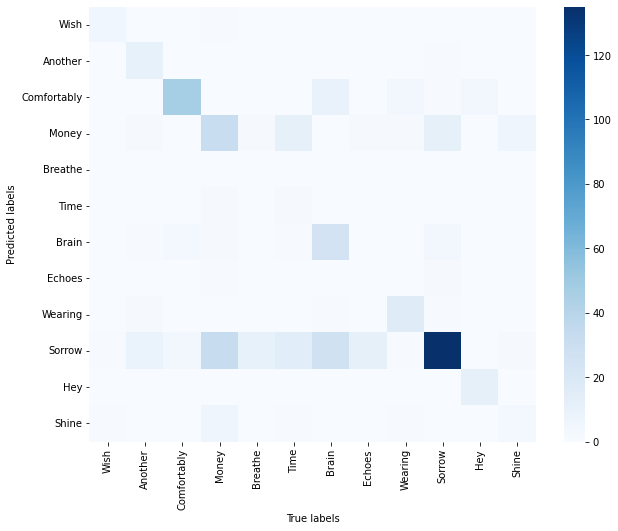

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

##VGG13

In [ ]:
vgg13 = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=class_number).VGG13() # Change the VGG Model if needed
vgg13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])
vgg13.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 36, 32)            608       
                                                                 
 batch_normalization_8 (Batc  (None, 36, 32)           128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 36, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 36, 32)            3104      
                                                                 
 batch_normalization_9 (Batc  (None, 36, 32)           128       
 hNormalization)                                           

In [ ]:
valid_set = (x_test, y_test)

# Train the model
history = vgg13.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 22s 302ms/step - loss: 2.1105 - mse: 0.0686 - accuracy: 0.3478 - val_loss: 2.1528 - val_mse: 0.0673 - val_accuracy: 0.3646 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 17s 276ms/step - loss: 1.8488 - mse: 0.0645 - accuracy: 0.3911 - val_loss: 1.9210 - val_mse: 0.0633 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 17s 275ms/step - loss: 1.7322 - mse: 0.0617 - accuracy: 0.4226 - val_loss: 1.8215 - val_mse: 0.0633 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 17s 276ms/step - loss: 1.6341 - mse: 0.0585 - accuracy: 0.4525 - val_loss: 2.2295 - val_mse: 0.0701 - val_accuracy: 0.3462 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 17s 276ms/step - loss: 1.5781 - mse: 0.0585 - accuracy: 0.4536 - val_loss: 1.8772 - val_mse: 0.0620 - val_accuracy: 0.4521 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 17

In [ ]:
# Predict the test set with the 1DCNN
predictions = vgg13.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 46ms/step


(491, 12)

Accuracy: 0.5662
Precision: 0.5338
Recall: 0.3811
F1: 0.4152


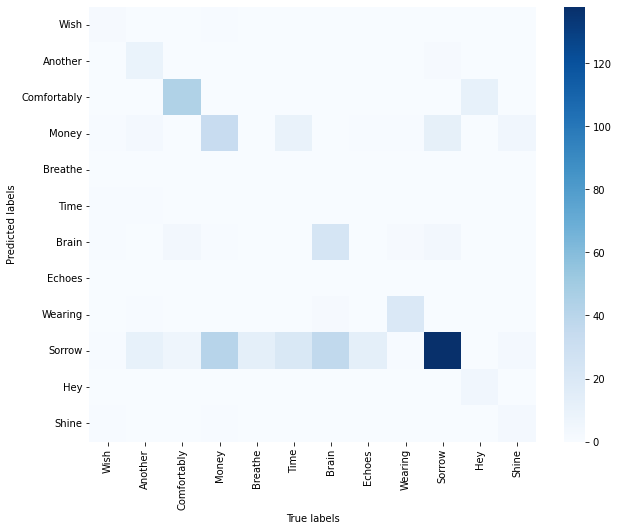

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

##VGG19

In [ ]:
vgg19 = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=class_number).VGG19() # Change the VGG Model if needed
vgg19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','accuracy'])
vgg19.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 36, 6)]           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 36, 32)            608       
                                                                 
 batch_normalization_18 (Bat  (None, 36, 32)           128       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 36, 32)            0         
                                                                 
 conv1d_19 (Conv1D)          (None, 36, 32)            3104      
                                                                 
 batch_normalization_19 (Bat  (None, 36, 32)           128       
 chNormalization)                                          

In [ ]:
valid_set = (x_test, y_test)

# Train the model
history = vgg19.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
61/61 [==============================] - 28s 369ms/step - loss: 2.1106 - mse: 0.0692 - accuracy: 0.3287 - val_loss: 2.4580 - val_mse: 0.0696 - val_accuracy: 0.3462 - lr: 0.0010
Epoch 2/200
61/61 [==============================] - 23s 385ms/step - loss: 1.9151 - mse: 0.0664 - accuracy: 0.3607 - val_loss: 2.2496 - val_mse: 0.0692 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - 22s 358ms/step - loss: 1.8274 - mse: 0.0645 - accuracy: 0.3983 - val_loss: 2.2660 - val_mse: 0.0724 - val_accuracy: 0.3788 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - 22s 356ms/step - loss: 1.7969 - mse: 0.0636 - accuracy: 0.4014 - val_loss: 2.4160 - val_mse: 0.0710 - val_accuracy: 0.3523 - lr: 0.0010
Epoch 5/200
61/61 [==============================] - 22s 354ms/step - loss: 1.7530 - mse: 0.0628 - accuracy: 0.3953 - val_loss: 2.6249 - val_mse: 0.0707 - val_accuracy: 0.3646 - lr: 0.0010
Epoch 6/200
61/61 [==============================] - 22

In [ ]:
# Predict the test set with the 1DCNN
predictions = vgg19.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 54ms/step


(491, 12)

Accuracy: 0.5621
Precision: 0.442
Recall: 0.3606
F1: 0.3694


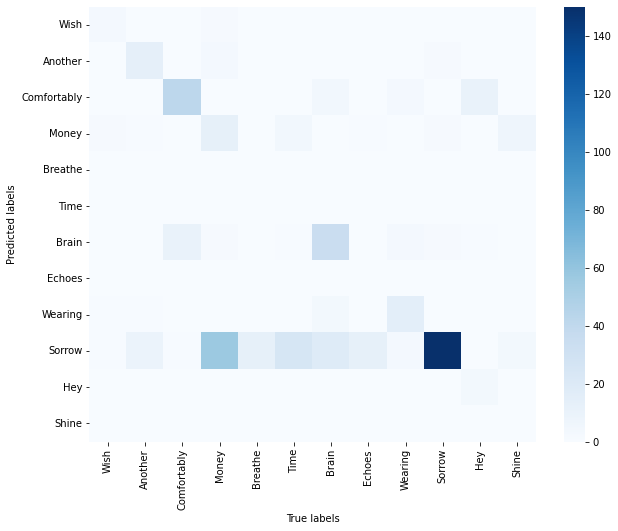

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

#1d ResNet

In [ ]:
def build_resNet(input_shape, nb_classes):
    n_feature_maps = 64

    input_layer = tf.keras.layers.Input(input_shape)

    # BLOCK 1

    conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
    conv_x = tf.keras.layers.BatchNormalization()(conv_x)
    conv_x = tf.keras.layers.Activation('relu')(conv_x)

    conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
    conv_y = tf.keras.layers.BatchNormalization()(conv_y)
    conv_y = tf.keras.layers.Activation('relu')(conv_y)

    conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
    conv_z = tf.keras.layers.BatchNormalization()(conv_z)

    # expand channels for the sum
    shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
    shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

    output_block_1 = tf.keras.layers.add([shortcut_y, conv_z])
    output_block_1 = tf.keras.layers.Activation('relu')(output_block_1)

    # BLOCK 2

    conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
    conv_x = tf.keras.layers.BatchNormalization()(conv_x)
    conv_x = tf.keras.layers.Activation('relu')(conv_x)

    conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
    conv_y = tf.keras.layers.BatchNormalization()(conv_y)
    conv_y = tf.keras.layers.Activation('relu')(conv_y)

    conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
    conv_z = tf.keras.layers.BatchNormalization()(conv_z)

    # expand channels for the sum
    shortcut_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
    shortcut_y = tf.keras.layers.BatchNormalization()(shortcut_y)

    output_block_2 = tf.keras.layers.add([shortcut_y, conv_z])
    output_block_2 = tf.keras.layers.Activation('relu')(output_block_2)

    # BLOCK 3

    conv_x = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
    conv_x = tf.keras.layers.BatchNormalization()(conv_x)
    conv_x = tf.keras.layers.Activation('relu')(conv_x)

    conv_y = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
    conv_y = tf.keras.layers.BatchNormalization()(conv_y)
    conv_y = tf.keras.layers.Activation('relu')(conv_y)

    conv_z = tf.keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
    conv_z = tf.keras.layers.BatchNormalization()(conv_z)

    # no need to expand channels because they are equal
    shortcut_y = tf.keras.layers.BatchNormalization()(output_block_2)

    output_block_3 = tf.keras.layers.add([shortcut_y, conv_z])
    output_block_3 = tf.keras.layers.Activation('relu')(output_block_3)

    # FINAL

    gap_layer = tf.keras.layers.GlobalAveragePooling1D()(output_block_3)

    output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

    return model

In [ ]:
resNet = build_resNet(length, class_number)
resNet.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 36, 6)]      0           []                               
                                                                                                  
 conv1d_113 (Conv1D)            (None, 36, 64)       3136        ['input_10[0][0]']               
                                                                                                  
 batch_normalization_112 (Batch  (None, 36, 64)      256         ['conv1d_113[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_97 (Activation)     (None, 36, 64)       0           ['batch_normalization_112[0

In [ ]:

# Train the model
history = resNet.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
     validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
31/31 [==============================] - 13s 279ms/step - loss: 1.9339 - accuracy: 0.3942 - val_loss: 2.4447 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/200
31/31 [==============================] - 7s 215ms/step - loss: 1.4774 - accuracy: 0.5000 - val_loss: 1.9938 - val_accuracy: 0.4053 - lr: 0.0010
Epoch 3/200
31/31 [==============================] - 7s 211ms/step - loss: 1.3390 - accuracy: 0.5531 - val_loss: 1.6532 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 4/200
31/31 [==============================] - 7s 222ms/step - loss: 1.2512 - accuracy: 0.5676 - val_loss: 1.4520 - val_accuracy: 0.5051 - lr: 0.0010
Epoch 5/200
31/31 [==============================] - 7s 216ms/step - loss: 1.1887 - accuracy: 0.5980 - val_loss: 1.3508 - val_accuracy: 0.5356 - lr: 0.0010
Epoch 6/200
31/31 [==============================] - 7s 215ms/step - loss: 1.1494 - accuracy: 0.5918 - val_loss: 1.7540 - val_accuracy: 0.5071 - lr: 0.0010
Epoch 7/200
31/31 [==============================] - 7s 214ms/s

In [ ]:
# Predict the test set with the LSTM
predictions = resNet.predict(x_test)
predictions.shape

16/16 [==============================] - 2s 28ms/step


(491, 12)

Accuracy: 0.6477
Precision: 0.6385
Recall: 0.5107
F1: 0.5392


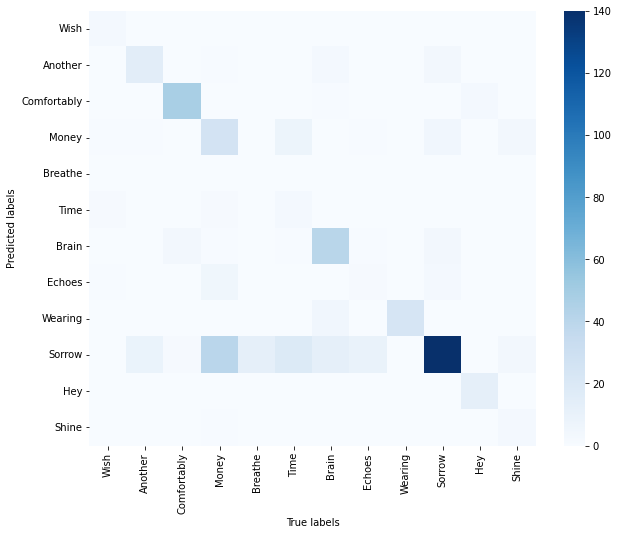

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

with data augmentation

In [ ]:
valid_set = (x_test, y_test)
# Train the model
history = resNet.fit(
    x = x_train_SMOTE,
    y = y_train_SMOTE,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_set,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
233/233 [==============================] - 31s 134ms/step - loss: 0.2752 - accuracy: 0.9089 - val_loss: 2.3266 - val_accuracy: 0.5642 - lr: 6.2500e-05
Epoch 2/200
233/233 [==============================] - 30s 127ms/step - loss: 0.2666 - accuracy: 0.9100 - val_loss: 1.7615 - val_accuracy: 0.5845 - lr: 6.2500e-05
Epoch 3/200
233/233 [==============================] - 30s 129ms/step - loss: 0.2772 - accuracy: 0.9083 - val_loss: 2.6682 - val_accuracy: 0.5132 - lr: 6.2500e-05
Epoch 4/200
233/233 [==============================] - 31s 135ms/step - loss: 0.2486 - accuracy: 0.9160 - val_loss: 2.0881 - val_accuracy: 0.5153 - lr: 6.2500e-05
Epoch 5/200
233/233 [==============================] - 29s 126ms/step - loss: 0.2463 - accuracy: 0.9130 - val_loss: 1.1731 - val_accuracy: 0.6497 - lr: 6.2500e-05
Epoch 6/200
233/233 [==============================] - 30s 127ms/step - loss: 0.2516 - accuracy: 0.9143 - val_loss: 1.3212 - val_accuracy: 0.6456 - lr: 6.2500e-05
Epoch 7/200
233/233 [=

In [ ]:
# Predict the test set with the LSTM
predictions = resNet.predict(x_test)
predictions.shape

16/16 [==============================] - 1s 28ms/step


(491, 12)

Accuracy: 0.6497
Precision: 0.6506
Recall: 0.5347
F1: 0.5527


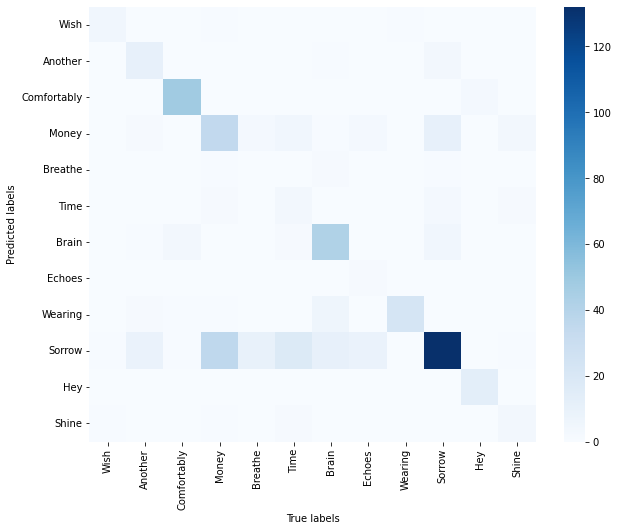

In [ ]:
plot_confusionMatrix(y_test, predictions, label_mapping)

In [ ]:
resNet.save('resNet_1.h5')